# Recreating Roelof's PPA Model

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

STEP_SIZE = 25   # duration time step in ms
N_STEPs = 80     # 2000 ms in total
N_CONCEPTs = 5   
N_LEMMAs = 5     
N_MORPHEMEs = 5  
N_PHONEMEs = 10   
N_SYLLABLEs = 5  

N_lesion_values = 100 # for 100 for weight lesion, 66 (!) for decay lesion

N_GROUPs = 4 # Normal, Nonfluent_agrammatic, Semantic_dementia, Logopenic
NORMAL = 0
NONFLUENT_AGRAMMATIC = 1
SEMANTIC_DEMENTIA = 2
LOGOPENIC = 3

N_TASKs = 3 # Naming, Comprehension, Repetition
NAMING = 0
COMPREHENSION = 1
REPETITION = 2

N_ASSESSMENTs = 6
ENGLISH = 0
DUTCH = 1
BRAMBATI_T1 = 2 # baseline 
BRAMBATI_T2 = 3 # follow up 
ROHRERMANDELLI_T1 = 4 # baseline 
ROHRERMANDELLI_T2 = 5 # follow up 

Y = 1.0     # connection present 
N = 0.0     # connection absent

# labeling network nodes
CAT = 0
DOG = 1
MAT = 2
FOG = 3
FISH = 4

pK = 0 # phonemes
pE = 1
pT = 2
pD = 3
pO = 4
pG = 5
pM = 6
pF = 7
pI = 8
pS = 9

Cat = 0
Dog = 1
Mat = 2
Fog = 3
Fish = 4

# connections conceptual network [N_CONCEPTs][N_CONCEPTs]
CC_con =  np.array([
    # CAT   DOG  MAT  FOG  FISH  
    [   N,    Y,   N,   N,    Y ], # CAT
    [   Y,    N,   N,   N,    Y ], # DOG
    [   N,    N,   N,   N,    N ], # MAT
    [   N,    N,   N,   N,    N ], # FOG
    [   Y,    Y,   N,   N,    N ]  # FISH
])

# connections between concept and lemma nodes [N_CONCEPTs][N_LEMMAs]
CL_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between lemma nodes and morpheme nodes [N_LEMMAs][N_MORPHEMEs]
LM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between morpheme nodes and output phoneme nodes [N_MORPHEMEs][N_PHONEMEs]
MP_con = np.array([
     #  K  E  T  D  O  G  M  F  I  S  
    [   Y, Y, Y, N, N, N, N, N, N, N ], # <cat>
    [   N, N, N, Y, Y, Y, N, N, N, N ], # <dog>
    [   N, Y, Y, N, N, N, Y, N, N, N ], # <mat>
    [   N, N, N, N, Y, Y, N, Y, N, N ], # <fog>
    [   N, N, N, N, N, N, N, Y, Y, Y ]  # <fish>
])

# connections between output phoneme nodes and syllable program nodes [N_PHONEMEs][N_SYLLABLEs]
PS_con = np.array([
    # Cat Dog  Mat Fog  Fish
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input and output phoneme nodes [N_PHONEMEs][N_PHONEMEs]
PP_con = np.array([
    # K    E    T   D    O    G   M   F   I  S 
    [ Y,   N,   N,  N,   N,   N,  N,  N,  N, N  ], # K
    [ N,   Y,   N,  N,   N,   N,  N,  N,  N, N  ], # E
    [ N,   N,   Y,  N,   N,   N,  N,  N,  N, N  ], # T
    [ N,   N,   N,  Y,   N,   N,  N,  N,  N, N  ], # D
    [ N,   N,   N,  N,   Y,   N,  N,  N,  N, N  ], # O
    [ N,   N,   N,  N,   N,   Y,  N,  N,  N, N  ], # G
    [ N,   N,   N,  N,   N,   N,  Y,  N,  N, N  ], # M
    [ N,   N,   N,  N,   N,   N,  N,  Y,  N, N  ], # F
    [ N,   N,   N,  N,   N,   N,  N,  N,  Y, N  ], # I
    [ N,   N,   N,  N,   N,   N,  N,  N,  N, Y  ]  # S
])

# connections between input phoneme nodes and input morpheme nodes [N_PHONEMEs][N_MORPHEMEs]
PiM_con = np.array([
    # Cat Dog  Mat Fog  Fish 
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input morpheme and output morpheme nodes [N_MORPHEMEs][N_MORPHEMEs]
iMM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between input morpheme and lemma nodes [N_MORPHEMEs][N_LEMMAs]
iML_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])



In [3]:
# English data on PPA for single word tasks: Savage et al. (2013) [N_GROUPs][N_TASKs]
REAL_DATA_ENGLISH = np.array([
    # Naming  Comprehension Repetition
    [ 88.7,      97.0,      99.7 ], # Control
    [ 78.3,      94.3,      79.7 ], # nfvPPA
    [ 22.7,      63.3,      95.3 ], # svPPA
    [ 41.3,      84.7,      84.7 ]  # lvPPA
])

# Dutch data on PPA for single word tasks: Janssen et al. (2021) [N_GROUPs][N_TASKs]
REAL_DATA_DUTCH = np.array([
    # Naming  Comprehension Repetition */
    [ 90.3,      96.3,      96.7 ], # Control
    [ 77.3,      97.7,      89.3 ], # nfvPPA
    [ 29.0,      78.0,      96.3 ], # svPPA
    [ 66.3,      93.7,      91.3 ]  # lvPPA
])

# Brambati T1 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 85.3,      99.7,      83.7 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA
    [ 69.3,      95.0,      69.0 ]  # lvPPA
])

# Brambati T2 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T2 = np.array([
    # Naming  Comprehension Repetition
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 83.3,      94.8,      68.0 ], # nfvPPA
    [ 19.3,      66.7,      82.3 ], # svPPA
    [ 52.7,      95.0,      58.8 ]  # lvPPA
])

# Rohrer et al. (2013), logopenic patients (N=21), T1 baseline and T2 one year later
# Mandelli et al. (2016), nonfluent/agrammatic patients (N=34), T1 baseline and T2 one year later

# RohrerMandelli T1 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 76.7,      99.0,      81.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 61.0,      94.0,      94.0 ]  # lvPPA
])

# RohrerMandelli T2 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T2 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 66.0,      90.0,      65.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 43.0,      85.0,      77.0 ]  # lvPPA
])



In [4]:
# parameter values
CYCLE_TIME = 25                 # ms per link 
SEM_rate = 0.0101 * STEP_SIZE   # prop per step_size ms 
LEM_rate = 0.0074 * STEP_SIZE   # prop per step_size ms 
LEX_rate = 0.0120 * STEP_SIZE   # prop per step_size ms 
DECAY_rate = 0.0240 * STEP_SIZE # prop per step_size ms 
EXTIN = 0.1965 * STEP_SIZE      # act_units per step_size ms 
LEMLEXFRAC = 0.3 
# fraction of LEX_rate spread between lemmas and output morphemes 
# implementing weak cascading of activation, see Roelofs (2008, JEP:LMC) 

FR = 0.10  # fraction of connection weight for input phoneme to input morpheme, cf. Roelofs (1997, Cognition)
SEGMENT_DURATION = 125  # ms
PICTURE_DURATION = 125  # ms

# set here to simulate weight or decay lesion and what to print 
WEIGHT_LESION = 1
DECAY_LESION = 0

SHOW_RESULTS_ALL_VALUES = 0 # set here whether to print all values 



### Model Definition

In [5]:
class Model:
    def __init__(
        self,
        
        CC_con = CC_con,
        CL_con = CL_con,
        LM_con = LM_con,
        MP_con = MP_con,
        PS_con = PS_con,
        PP_con = PP_con,
        PiM_con = PiM_con,
        iMM_con = iMM_con,
        iML_con = iML_con,
        
        REAL_DATA = np.zeros(shape=(N_GROUPs, N_TASKs)),
        SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs)),
        GOODNESS_OF_FIT = np.zeros(N_lesion_values),

        WEIGHT_value = np.zeros(N_lesion_values),
        DECAY_value = np.zeros(N_lesion_values),

        # concept and lemma
        C_node_act = np.zeros(N_CONCEPTs),
        L_node_act = np.zeros(N_LEMMAs),
        # output form 
        M_node_act = np.zeros(N_MORPHEMEs),
        oP_node_act = np.zeros(N_PHONEMEs),
        S_node_act = np.zeros(N_SYLLABLEs),
        # input form 
        iM_node_act = np.zeros(N_MORPHEMEs),
        iP_node_act = np.zeros(N_PHONEMEs),

        # input buffer for nodes 
        input_C = np.zeros(N_CONCEPTs),
        input_L = np.zeros(N_LEMMAs),
        input_M = np.zeros(N_MORPHEMEs),
        input_iM = np.zeros(N_MORPHEMEs),
        input_iP = np.zeros(N_PHONEMEs),
        input_oP = np.zeros(N_PHONEMEs),
        input_S = np.zeros(N_SYLLABLEs),
        
        # Aphasia parameters

        # weight lesion 
        CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 0.0, # connections to/from output phonemes 
        CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 0.0, # connections to/within/from conceptual network
        CONNECTION_DECREASE_LOGOPENIC = 0.0, # connections to/from lexical output forms, and b/w input/output phonemes

        # decay lesion
        DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 0.0, # output phonemes 
        DECAY_INCREASE_SEMANTIC_DEMENTIA = 0.0, # concepts
        DECAY_INCREASE_LOGOPENIC = 0.0, # lexical output forms

        ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),
        ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),

        # Activation of target concept, cat
        ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),
        # Activation of conceptual relative, dog
        ACT_CR= np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),

        # Activation of target lemma, cat
        ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),
        # Activation of lemma relative, i.e., semantically related, dog
        ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),

        # Activation of target syllable, cat
        ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),
        # Activation of syllabic relative, mat
        ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs)),

        TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),

        # T = target, R = relative
        TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),

        TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),

        TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
        MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs)),
    ):
        
        self.CC_con = CC_con
        self.CL_con = CL_con
        self.LM_con = LM_con
        self.MP_con = MP_con
        self.PS_con = PS_con
        self.PP_con = PP_con
        self.PiM_con = PiM_con
        self.iMM_con = iMM_con
        self.iML_con = iML_con
        
        self.REAL_DATA = REAL_DATA
        self.SIM_DATA = SIM_DATA
        self.GOODNESS_OF_FIT = GOODNESS_OF_FIT

        self.WEIGHT_value = WEIGHT_value
        self.DECAY_value = DECAY_value

        self.C_node_act = C_node_act
        self.L_node_act = L_node_act
        self.M_node_act = M_node_act
        self.oP_node_act = oP_node_act
        self.S_node_act = S_node_act
        self.iM_node_act = iM_node_act
        self.iP_node_act = iP_node_act

        self.input_C = input_C
        self.input_L = input_L
        self.input_M = input_M
        self.input_iM = input_iM
        self.input_iP = input_iP
        self.input_oP = input_oP
        self.input_S = input_S
        
        self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC
        self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = CONNECTION_DECREASE_SEMANTIC_DEMENTIA
        self.CONNECTION_DECREASE_LOGOPENIC = CONNECTION_DECREASE_LOGOPENIC

        self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = DECAY_INCREASE_NONFLUENT_AGRAMMATIC
        self.DECAY_INCREASE_SEMANTIC_DEMENTIA = DECAY_INCREASE_SEMANTIC_DEMENTIA
        self.DECAY_INCREASE_LOGOPENIC = DECAY_INCREASE_LOGOPENIC

        self.ACT_C = ACT_C
        self.ACT_S = ACT_S
        self.ACT_CT = ACT_CT
        self.ACT_CR = ACT_CR
        self.ACT_LT = ACT_LT
        self.ACT_LR = ACT_LR
        self.ACT_ST = ACT_ST
        self.ACT_SR = ACT_SR

        self.TOTAL_ACT_C = TOTAL_ACT_C
        self.MEAN_ACT_C = MEAN_ACT_C
        self.TOTAL_ACT_S = TOTAL_ACT_S
        self.MEAN_ACT_S = MEAN_ACT_S

        self.TOTAL_ACT_CT = TOTAL_ACT_CT
        self.MEAN_ACT_CT = MEAN_ACT_CT
        self.TOTAL_ACT_CR = TOTAL_ACT_CR
        self.MEAN_ACT_CR = MEAN_ACT_CR

        self.TOTAL_ACT_LT = TOTAL_ACT_LT
        self.MEAN_ACT_LT = MEAN_ACT_LT
        self.TOTAL_ACT_LR = TOTAL_ACT_LR
        self.MEAN_ACT_LR = MEAN_ACT_LR

        self.TOTAL_ACT_ST = TOTAL_ACT_ST
        self.MEAN_ACT_ST = MEAN_ACT_ST
        self.TOTAL_ACT_SR = TOTAL_ACT_SR
        self.MEAN_ACT_SR = MEAN_ACT_SR
        
        
    def test(self):
        print('hi')
        
    
    def plot_activation_critical_nodes(self, title = 'Activation of Critical Nodes'):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
        
        # N_lesion_values, N_STEPs, N_GROUPs, N_TASKs
        # NORMAL = 0, NONFLUENT_AGRAMMATIC = 1, SEMANTIC_DEMENTIA = 2, LOGOPENIC = 3
        # NAMING = 0, COMPREHENSION = 1, REPETITION = 2
        ax1.plot(self.ACT_C[:, -1, 0, 0], label='ACT_C')
        ax1.plot(self.ACT_S[:, -1, 0, 0], label='ACT_S')
        ax1.plot(self.ACT_CT[:, -1, 0, 0], label='ACT_CT')
        ax1.plot(self.ACT_CR[:, -1, 0, 0], label='ACT_CR')
        ax1.plot(self.ACT_LT[:, -1, 0, 0], label='ACT_LT')
        ax1.plot(self.ACT_LR[:, -1, 0, 0], label='ACT_LR')
        ax1.plot(self.ACT_ST[:, -1, 0, 0], label='ACT_ST')
        ax1.plot(self.ACT_SR[:, -1, 0, 0], label='ACT_SR')
        ax1.set_title('Normal')
        ax1.legend()
        
        ax2.plot(self.ACT_C[:, -1, 1, 0], label='ACT_C')
        ax2.plot(self.ACT_S[:, -1, 1, 0], label='ACT_S')
        ax2.plot(self.ACT_CT[:, -1, 1, 0], label='ACT_CT')
        ax2.plot(self.ACT_CR[:, -1, 1, 0], label='ACT_CR')
        ax2.plot(self.ACT_LT[:, -1, 1, 0], label='ACT_LT')
        ax2.plot(self.ACT_LR[:, -1, 1, 0], label='ACT_LR')
        ax2.plot(self.ACT_ST[:, -1, 1, 0], label='ACT_ST')
        ax2.plot(self.ACT_SR[:, -1, 1, 0], label='ACT_SR')
        ax2.set_title('Nonfluent Agrammatic')
        ax2.legend()
        
        ax3.plot(self.ACT_C[:, -1, 2, 0], label='ACT_C')
        ax3.plot(self.ACT_S[:, -1, 2, 0], label='ACT_S')
        ax3.plot(self.ACT_CT[:, -1, 2, 0], label='ACT_CT')
        ax3.plot(self.ACT_CR[:, -1, 2, 0], label='ACT_CR')
        ax3.plot(self.ACT_LT[:, -1, 2, 0], label='ACT_LT')
        ax3.plot(self.ACT_LR[:, -1, 2, 0], label='ACT_LR')
        ax3.plot(self.ACT_ST[:, -1, 2, 0], label='ACT_ST')
        ax3.plot(self.ACT_SR[:, -1, 2, 0], label='ACT_SR')
        ax3.set_title('Semantic Dementia')
        ax3.legend()
        
        ax4.plot(self.ACT_C[:, -1, 3, 0], label='ACT_C')
        ax4.plot(self.ACT_S[:, -1, 3, 0], label='ACT_S')
        ax4.plot(self.ACT_CT[:, -1, 3, 0], label='ACT_CT')
        ax4.plot(self.ACT_CR[:, -1, 3, 0], label='ACT_CR')
        ax4.plot(self.ACT_LT[:, -1, 3, 0], label='ACT_LT')
        ax4.plot(self.ACT_LR[:, -1, 3, 0], label='ACT_LR')
        ax4.plot(self.ACT_ST[:, -1, 3, 0], label='ACT_ST')
        ax4.plot(self.ACT_SR[:, -1, 3, 0], label='ACT_SR')
        ax4.set_title('Logopenic')
        ax4.legend()
        
        fig.suptitle(title + ' (Naming)')
        fig.savefig('activation_critical_nodes_naming.png')
        plt.show()
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
        ax1.plot(self.ACT_C[:, -1, 0, 1], label='ACT_C')
        ax1.plot(self.ACT_S[:, -1, 0, 1], label='ACT_S')
        ax1.plot(self.ACT_CT[:, -1, 0, 1], label='ACT_CT')
        ax1.plot(self.ACT_CR[:, -1, 0, 1], label='ACT_CR')
        ax1.plot(self.ACT_LT[:, -1, 0, 1], label='ACT_LT')
        ax1.plot(self.ACT_LR[:, -1, 0, 1], label='ACT_LR')
        ax1.plot(self.ACT_ST[:, -1, 0, 1], label='ACT_ST')
        ax1.plot(self.ACT_SR[:, -1, 0, 1], label='ACT_SR')
        ax1.set_title('Normal')
        ax1.legend()
        
        ax2.plot(self.ACT_C[:, -1, 1, 1], label='ACT_C')
        ax2.plot(self.ACT_S[:, -1, 1, 1], label='ACT_S')
        ax2.plot(self.ACT_CT[:, -1, 1, 1], label='ACT_CT')
        ax2.plot(self.ACT_CR[:, -1, 1, 1], label='ACT_CR')
        ax2.plot(self.ACT_LT[:, -1, 1, 1], label='ACT_LT')
        ax2.plot(self.ACT_LR[:, -1, 1, 1], label='ACT_LR')
        ax2.plot(self.ACT_ST[:, -1, 1, 1], label='ACT_ST')
        ax2.plot(self.ACT_SR[:, -1, 1, 1], label='ACT_SR')
        ax2.set_title('Nonfluent Agrammatic')
        ax2.legend()
        
        ax3.plot(self.ACT_C[:, -1, 2, 1], label='ACT_C')
        ax3.plot(self.ACT_S[:, -1, 2, 1], label='ACT_S')
        ax3.plot(self.ACT_CT[:, -1, 2, 1], label='ACT_CT')
        ax3.plot(self.ACT_CR[:, -1, 2, 1], label='ACT_CR')
        ax3.plot(self.ACT_LT[:, -1, 2, 1], label='ACT_LT')
        ax3.plot(self.ACT_LR[:, -1, 2, 1], label='ACT_LR')
        ax3.plot(self.ACT_ST[:, -1, 2, 1], label='ACT_ST')
        ax3.plot(self.ACT_SR[:, -1, 2, 1], label='ACT_SR')
        ax3.set_title('Semantic Dementia')
        ax3.legend()
        
        ax4.plot(self.ACT_C[:, -1, 3, 1], label='ACT_C')
        ax4.plot(self.ACT_S[:, -1, 3, 1], label='ACT_S')
        ax4.plot(self.ACT_CT[:, -1, 3, 1], label='ACT_CT')
        ax4.plot(self.ACT_CR[:, -1, 3, 1], label='ACT_CR')
        ax4.plot(self.ACT_LT[:, -1, 3, 1], label='ACT_LT')
        ax4.plot(self.ACT_LR[:, -1, 3, 1], label='ACT_LR')
        ax4.plot(self.ACT_ST[:, -1, 3, 1], label='ACT_ST')
        ax4.plot(self.ACT_SR[:, -1, 3, 1], label='ACT_SR')
        ax4.set_title('Logopenic')
        ax4.legend()
        
        fig.suptitle(title + ' (Comprehension)')
        fig.savefig('activation_critical_nodes_comprehension.png')
        plt.show()
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
        ax1.plot(self.ACT_C[:, -1, 0, 2], label='ACT_C')
        ax1.plot(self.ACT_S[:, -1, 0, 2], label='ACT_S')
        ax1.plot(self.ACT_CT[:, -1, 0, 2], label='ACT_CT')
        ax1.plot(self.ACT_CR[:, -1, 0, 2], label='ACT_CR')
        ax1.plot(self.ACT_LT[:, -1, 0, 2], label='ACT_LT')
        ax1.plot(self.ACT_LR[:, -1, 0, 2], label='ACT_LR')
        ax1.plot(self.ACT_ST[:, -1, 0, 2], label='ACT_ST')
        ax1.plot(self.ACT_SR[:, -1, 0, 2], label='ACT_SR')
        ax1.set_title('Normal')
        ax1.legend()
        
        ax2.plot(self.ACT_C[:, -1, 1, 2], label='ACT_C')
        ax2.plot(self.ACT_S[:, -1, 1, 2], label='ACT_S')
        ax2.plot(self.ACT_CT[:, -1, 1, 2], label='ACT_CT')
        ax2.plot(self.ACT_CR[:, -1, 1, 2], label='ACT_CR')
        ax2.plot(self.ACT_LT[:, -1, 1, 2], label='ACT_LT')
        ax2.plot(self.ACT_LR[:, -1, 1, 2], label='ACT_LR')
        ax2.plot(self.ACT_ST[:, -1, 1, 2], label='ACT_ST')
        ax2.plot(self.ACT_SR[:, -1, 1, 2], label='ACT_SR')
        ax2.set_title('Nonfluent Agrammatic')
        ax2.legend()
        
        ax3.plot(self.ACT_C[:, -1, 2, 2], label='ACT_C')
        ax3.plot(self.ACT_S[:, -1, 2, 2], label='ACT_S')
        ax3.plot(self.ACT_CT[:, -1, 2, 2], label='ACT_CT')
        ax3.plot(self.ACT_CR[:, -1, 2, 2], label='ACT_CR')
        ax3.plot(self.ACT_LT[:, -1, 2, 2], label='ACT_LT')
        ax3.plot(self.ACT_LR[:, -1, 2, 2], label='ACT_LR')
        ax3.plot(self.ACT_ST[:, -1, 2, 2], label='ACT_ST')
        ax3.plot(self.ACT_SR[:, -1, 2, 2], label='ACT_SR')
        ax3.set_title('Semantic Dementia')
        ax3.legend()
        
        ax4.plot(self.ACT_C[:, -1, 3, 2], label='ACT_C')
        ax4.plot(self.ACT_S[:, -1, 3, 2], label='ACT_S')
        ax4.plot(self.ACT_CT[:, -1, 3, 2], label='ACT_CT')
        ax4.plot(self.ACT_CR[:, -1, 3, 2], label='ACT_CR')
        ax4.plot(self.ACT_LT[:, -1, 3, 2], label='ACT_LT')
        ax4.plot(self.ACT_LR[:, -1, 3, 2], label='ACT_LR')
        ax4.plot(self.ACT_ST[:, -1, 3, 2], label='ACT_ST')
        ax4.plot(self.ACT_SR[:, -1, 3, 2], label='ACT_SR')
        ax4.set_title('Logopenic')
        ax4.legend()
        
        fig.suptitle(title + ' (Repetition)')
        fig.savefig('activation_critical_nodes_repetition.png')
        plt.show()
    
    
    def set_real_data_matrix(self, assessment):
        if assessment == ENGLISH:
            self.REAL_DATA = REAL_DATA_ENGLISH
        elif assessment == DUTCH:
            self.REAL_DATA = REAL_DATA_DUTCH
        elif assessment == BRAMBATI_T1:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T1
        elif assessment == BRAMBATI_T2:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T2
        elif assessment == ROHRERMANDELLI_T1:
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T1
        elif (assessment == ROHRERMANDELLI_T2):
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T2
                    
                    
    def set_spreading_rates(self):
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        self.CC_con *= SEM_rate
        self.CL_con *= LEM_rate
        self.LM_con *= LEX_rate
        self.MP_con *= LEX_rate
        self.PS_con *= LEX_rate

        # connections for input phonemes to output phonemes, input morphemes, input morphemes to lemmas

        self.PP_con *= LEX_rate
        self.PiM_con *= (FR * LEX_rate)
        self.iMM_con *= LEX_rate
        self.iML_con *= LEX_rate
        
        
    def reset_network(self):
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        
        
    def set_aphasic_parameters(self, group, lesion_value):
        WEIGHT_FACTOR, DECAY_FACTOR = 0.0, 0.0

        if WEIGHT_LESION:
            WEIGHT_FACTOR = self.WEIGHT_value[lesion_value]  
        else:
            WEIGHT_FACTOR = 1.0

        if DECAY_LESION:
            DECAY_FACTOR = self.DECAY_value[lesion_value]   
        else:
            DECAY_FACTOR = 1.0


        # setting of weight parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal 

        if group == SEMANTIC_DEMENTIA:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.CONNECTION_DECREASE_LOGOPENIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_LOGOPENIC = 1.0 # normal

        # setting of decay parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal

        if group == SEMANTIC_DEMENTIA:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.DECAY_INCREASE_LOGOPENIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_LOGOPENIC = 1.0 # normal
            
        
    # NETWORK UPDATING ROUTINES 

    def update_network(self, task, T):
        self.set_input_to_zero()
        self.get_external_input(task, T)
        self.get_internal_input()
        self.update_activation_of_nodes()
        
        
    def set_input_to_zero(self):
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        
    def get_external_input(self, task, T):
        if task == NAMING:
            # picture input
            if (T >= 0 and T < PICTURE_DURATION):
                self.input_C[CAT] += self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA * EXTIN

            # enhancement
            if ((T >= (0 + 1 * CYCLE_TIME)) and  (T < (1 * CYCLE_TIME + PICTURE_DURATION))):
                self.input_C[CAT] += EXTIN

        if (task == COMPREHENSION or task == REPETITION): 

            # spoken word input */
            if ((0 <= T) and (T < SEGMENT_DURATION)):
                self.input_iP[pK] += EXTIN

            if ((SEGMENT_DURATION <= T) and (T < (2 * SEGMENT_DURATION))):
                self.input_iP[pE] += EXTIN


            if ((2 * SEGMENT_DURATION <= T) and (T < (3 * SEGMENT_DURATION))): 
                self.input_iP[pT] += EXTIN
                
                
    def get_internal_input(self):
        # input activation for concept nodes

        for i in range(N_CONCEPTs):
            for j in range(N_CONCEPTs):
                self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))

        for i in range(N_CONCEPTs):
            for j in range(N_LEMMAs):
                self.input_C[i] += (self.L_node_act[j] * self.CL_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)

        # input activation for lemma nodes
        for i in range(N_LEMMAs):
            for j in range(N_CONCEPTs):
                self.input_L[i] += (self.C_node_act[j] * self.CL_con[j][i] *  self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)

        for i in range(N_LEMMAs):
            for j in range(N_MORPHEMEs):                 
                self.input_L[i] += (self.iM_node_act[j] * self.iML_con[j][i])

        # input activation for output morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_LEMMAs):
                self.input_M[i] += (self.L_node_act[j] * LEMLEXFRAC * self.LM_con[j][i] 
                                    * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_MORPHEMEs):
            for j in range(N_MORPHEMEs):
                self.input_M[i] += (self.iM_node_act[j] * self.iMM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for output phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_MORPHEMEs):
                self.input_oP[i] += (self.M_node_act[j] * self.MP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_oP[i] += (self.iP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for syllable program nodes
        for i in range(N_SYLLABLEs):
            for j in range(N_PHONEMEs):
                self.input_S[i] += (self.oP_node_act[j] * self.PS_con[j][i] 
                                    * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC)

        # input activation for input phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_iP[i] += (self.oP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for input morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_PHONEMEs):
                self.input_iM[i] += (self.iP_node_act[j] * self.PiM_con[j][i])
                
                
    def update_activation_of_nodes(self):
        self.C_node_act = np.add(self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)), self.input_C)
        self.L_node_act = np.add(self.L_node_act * (1.0 - DECAY_rate), self.input_L)
        self.M_node_act = np.add(self.M_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_LOGOPENIC)), self.input_M)
        self.oP_node_act = np.add(self.oP_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)), self.input_oP)
        self.iP_node_act = np.add(self.iP_node_act * (1.0 - DECAY_rate), self.input_iP)
        self.iM_node_act = np.add(self.iM_node_act * (1.0 - DECAY_rate), self.input_iM)
        self.S_node_act = np.add(self.S_node_act * (1.0 - DECAY_rate), self.input_S)   
            
    
    def determine_activation_critical_nodes(self, lesion_value, step, group, task):
        self.ACT_C[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_S[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_CT[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_CR[lesion_value][step][group][task] = self.C_node_act[DOG]
        self.ACT_LT[lesion_value][step][group][task] = self.L_node_act[CAT]
        self.ACT_LR[lesion_value][step][group][task] = self.L_node_act[DOG]
        self.ACT_ST[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_SR[lesion_value][step][group][task] = self.S_node_act[MAT]
        
        
    def compute_activation_results(self):
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        for lesion_value in range(N_lesion_values):
            for group in range(N_GROUPs):
                for task in range(N_TASKs): 
                    for i in range(N_STEPs): 
                        self.TOTAL_ACT_C[lesion_value][group][task] += self.ACT_C[lesion_value][i][group][task]
                        self.TOTAL_ACT_S[lesion_value][group][task] += self.ACT_S[lesion_value][i][group][task]
                        self.TOTAL_ACT_CT[lesion_value][group][task] += self.ACT_CT[lesion_value][i][group][task]
                        self.TOTAL_ACT_CR[lesion_value][group][task] += self.ACT_CR[lesion_value][i][group][task]
                        self.TOTAL_ACT_LT[lesion_value][group][task] += self.ACT_LT[lesion_value][i][group][task]
                        self.TOTAL_ACT_LR[lesion_value][group][task] += self.ACT_LR[lesion_value][i][group][task]
                        self.TOTAL_ACT_ST[lesion_value][group][task] += self.ACT_ST[lesion_value][i][group][task]
                        self.TOTAL_ACT_SR[lesion_value][group][task] += self.ACT_SR[lesion_value][i][group][task]

                    self.MEAN_ACT_C[lesion_value][group][task] = (self.TOTAL_ACT_C[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_S[lesion_value][group][task] = (self.TOTAL_ACT_S[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CT[lesion_value][group][task] = (self.TOTAL_ACT_CT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CR[lesion_value][group][task] = (self.TOTAL_ACT_CR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LT[lesion_value][group][task] = (self.TOTAL_ACT_LT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LR[lesion_value][group][task] = (self.TOTAL_ACT_LR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_ST[lesion_value][group][task] = (self.TOTAL_ACT_ST[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_SR[lesion_value][group][task] = (self.TOTAL_ACT_SR[lesion_value][group][task] / N_STEPs)
                    
                    
    # FITS AND PRINTING

    def print_heading(self):
        print("\n")
        print("WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs\n")
        print("Simulation of group studies \n")
        
        
    def print_parameters(self):
        print("Parameter values:\n")
        print(f"cycle time : {CYCLE_TIME : 6d} [ms]\n")
        print(f"sem_rate   : {SEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"lem_rate   : {LEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"exin       : {EXTIN/STEP_SIZE : .4f} [act_units/ms]\n")
        print(f"d          : {DECAY_rate/STEP_SIZE : .4f} [prop/ms]\n")
        
        
    def compute_fits_and_print_results_on_screen(self, assessment):
        LV = 0.0 # lesion value

        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)

        if assessment == ENGLISH:
            print("\nAssessment is Savage et al. (2013), English\n")
        if assessment == DUTCH:
            print("\nAssessment is Janssen et al. (2022), Dutch\n")
        if assessment == BRAMBATI_T1:
            print("\nAssessment is Brambati et al. (2015), baseline T1\n")
        if assessment == BRAMBATI_T2:
            print("\nAssessment is Brambati et al. (2015), follow up T2\n")
        if assessment == ROHRERMANDELLI_T1:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
        if assessment == ROHRERMANDELLI_T2:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")


        for group in range(N_GROUPs): 
            print(" \n")

            if group == NORMAL:
                print("NORMAL \n")
            elif group == NONFLUENT_AGRAMMATIC:
                print("NONFLUENT/AGRAMMATIC \n")
            elif group == SEMANTIC_DEMENTIA:
                print("SEMANTIC DEMENTIA  \n")
            elif group == LOGOPENIC:
                print("LOGOPENIC  \n")

            if assessment == ENGLISH:
                print("\nSavage et al. (2013), English\n")
            if assessment == DUTCH:
                print("\nAssessment is Janssen et al. (2022), Dutch\n")
            if assessment == BRAMBATI_T1:
                print("\nAssessment is Brambati et al. (2015), baseline T1\n")
            if assessment == BRAMBATI_T2:
                print("\nAssessment is Brambati et al. (2015), follow up T2\n")
            if assessment == ROHRERMANDELLI_T1:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
            if assessment == ROHRERMANDELLI_T2:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")

            print("        Naming   Comprehension  Repetition \n")
            print(f"Real:   {self.REAL_DATA[group][NAMING] : 5.2f}         {self.REAL_DATA[group][COMPREHENSION] : 5.2f}        {self.REAL_DATA[group][REPETITION] : 5.2f} \n")
            print("Lesion:                                    MAE\n")


            for lesion_value in range(N_lesion_values): 

                self.SIM_DATA[group][NAMING] = (self.MEAN_ACT_ST[lesion_value][group][NAMING] - self.MEAN_ACT_SR[lesion_value][group][NAMING]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][NAMING] - self.MEAN_ACT_SR[lesion_value][NORMAL][NAMING]) * 100.0

                self.SIM_DATA[group][COMPREHENSION] = (self.MEAN_ACT_CT[lesion_value][group][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][group][COMPREHENSION]) / (self.MEAN_ACT_CT[lesion_value][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][NORMAL][COMPREHENSION]) * 100.0

                self.SIM_DATA[group][REPETITION] = (self.MEAN_ACT_ST[lesion_value][group][REPETITION] - self.MEAN_ACT_SR[lesion_value][group][REPETITION]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][REPETITION] - self.MEAN_ACT_SR[lesion_value][NORMAL][REPETITION]) * 100.0

                if group == NORMAL:
                    LV = 1.0
                elif WEIGHT_LESION:
                    LV = self.WEIGHT_value[lesion_value]
                elif DECAY_LESION:
                    LV = self.DECAY_value[lesion_value]

                self.GOODNESS_OF_FIT[lesion_value] = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING])
                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION])
                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION]) ) / 3.0

                if SHOW_RESULTS_ALL_VALUES: # toggle for printing the results for all lesion values 
                    sim_combined = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING]) 
                                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION]) 
                                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION])) / 3.0
                    
                    print(f"{LV : 5.2f}   {self.SIM_DATA[group][NAMING] : 5.2f}        {self.SIM_DATA[group][COMPREHENSION] : 5.2f}        {self.SIM_DATA[group][REPETITION] : 5.2f}     {sim_combined : 5.2f}\n")

            a = 0
            for i in range(N_lesion_values):
                if self.GOODNESS_OF_FIT[a] > self.GOODNESS_OF_FIT[i]:
                    a = i


            if WEIGHT_LESION:
                print(f"Best fit weight value = {self.WEIGHT_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")
            if DECAY_LESION:
                print(f"Best fit decay value = {self.DECAY_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")

            sim_naming = (self.MEAN_ACT_ST[a][group][NAMING] - self.MEAN_ACT_SR[a][group][NAMING]) / (self.MEAN_ACT_ST[a][NORMAL][NAMING] - self.MEAN_ACT_SR[a][NORMAL][NAMING]) * 100.0
            sim_comprehension = (self.MEAN_ACT_CT[a][group][COMPREHENSION] - self.MEAN_ACT_CR[a][group][COMPREHENSION]) / (self.MEAN_ACT_CT[a][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[a][NORMAL][COMPREHENSION]) * 100.0
            sim_repetition = (self.MEAN_ACT_ST[a][group][REPETITION] - self.MEAN_ACT_SR[a][group][REPETITION]) / (self.MEAN_ACT_ST[a][NORMAL][REPETITION] - self.MEAN_ACT_SR[a][NORMAL][REPETITION]) * 100.0
                
            print(f"Sim:   {sim_naming : 5.2f}         {sim_comprehension : 5.2f}        {sim_repetition : 5.2f} \n")


    # MAIN ROUTINES 

    def main(self):
        ls = 0.0 # exact lesion value 

        self.print_heading()
        self.print_parameters()
        self.set_spreading_rates()

        if WEIGHT_LESION:
            ls = 0.0
            for lesion_value in range(N_lesion_values):
                # values between maximally damaged, 0.0, and minimally damaged, 0.99
                self.WEIGHT_value[lesion_value] = ls 
                ls += 0.01

        if DECAY_LESION:
             # values between minimally damaged, 1.01, and maximally damaged, i.e., full decay, 1.66
            ls = 1.01
            for lesion_value in range(N_lesion_values):
                self.DECAY_value[lesion_value] = ls
                ls += 0.01


        for assessment in range(N_ASSESSMENTs):

            self.set_real_data_matrix(assessment)

            for group in range(N_GROUPs):

                for task in range(N_TASKs): 

                    for lesion_value in range(N_lesion_values): 

                        self.reset_network()
                        self.set_aphasic_parameters(group, lesion_value)

                        T = 0 # time in ms
                        step = 0
                        while T < (N_STEPs * STEP_SIZE):

                            self.update_network(task, T)
                            self.determine_activation_critical_nodes(lesion_value, step, group, task)

                            T += STEP_SIZE
                            step += 1
                            

            # MAPPING TO HUMAN DATA
            self.compute_activation_results()
            self.compute_fits_and_print_results_on_screen(assessment)
            self.plot_activation_critical_nodes()
            input()

        return 0
        
        

### Run the model:



WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs

Simulation of group studies 

Parameter values:

cycle time :     25 [ms]

sem_rate   :  0.0101 [prop/ms]

lem_rate   :  0.0074 [prop/ms]

exin       :  0.1965 [act_units/ms]

d          :  0.0240 [prop/ms]


Assessment is Savage et al. (2013), English

 

NORMAL 


Savage et al. (2013), English

        Naming   Comprehension  Repetition 

Real:    88.70          97.00         99.70 

Lesion:                                    MAE

Best fit weight value =  0.00   MAE =  4.87

Sim:    100.00          100.00         100.00 

 

NONFLUENT/AGRAMMATIC 


Savage et al. (2013), English

        Naming   Comprehension  Repetition 

Real:    78.30          94.30         79.70 

Lesion:                                    MAE

Best fit weight value =  0.91   MAE =  0.77

Sim:    78.17          93.68         78.13 

 

SEMANTIC DEMENTIA  


Savage et al. (2013), English

        Naming   Comprehension  Repetition 

R

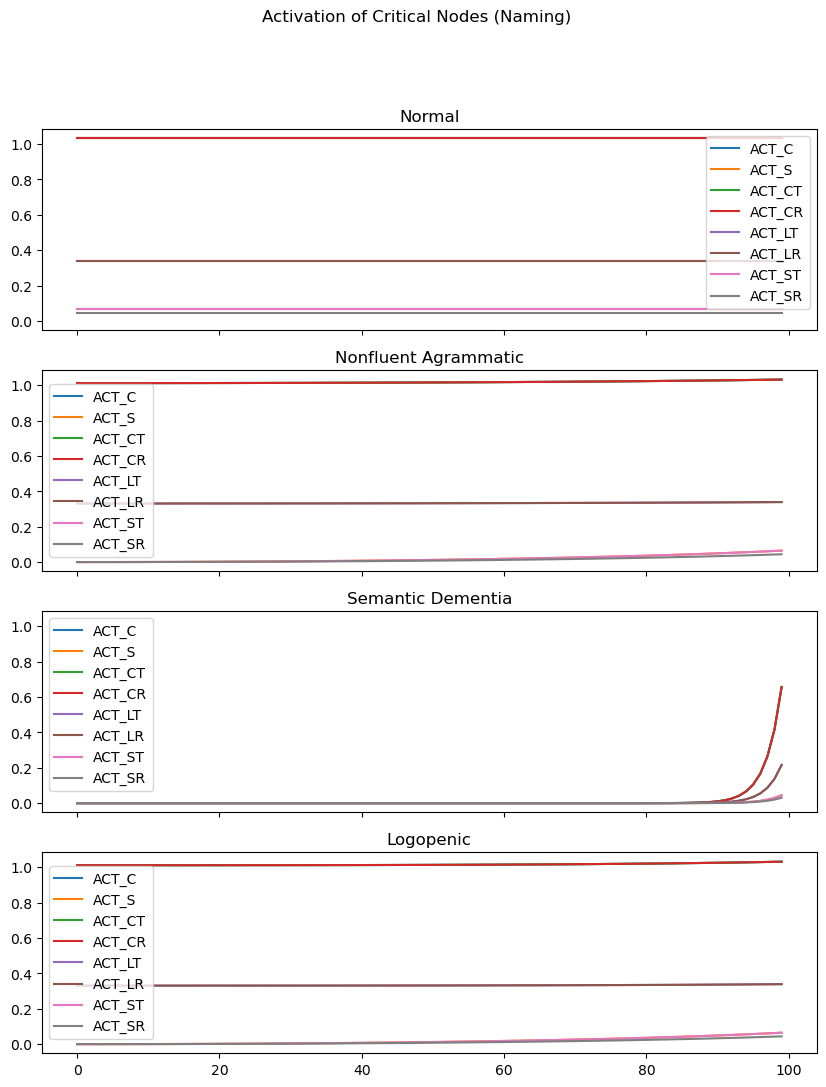

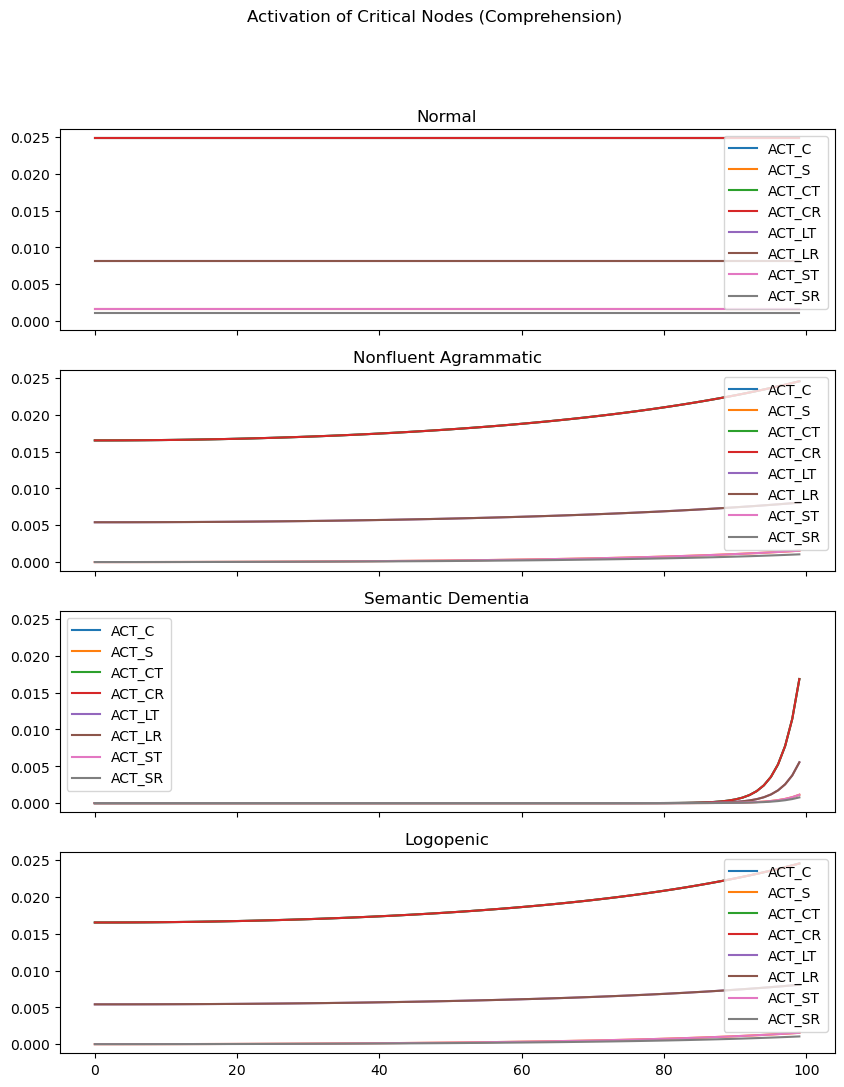

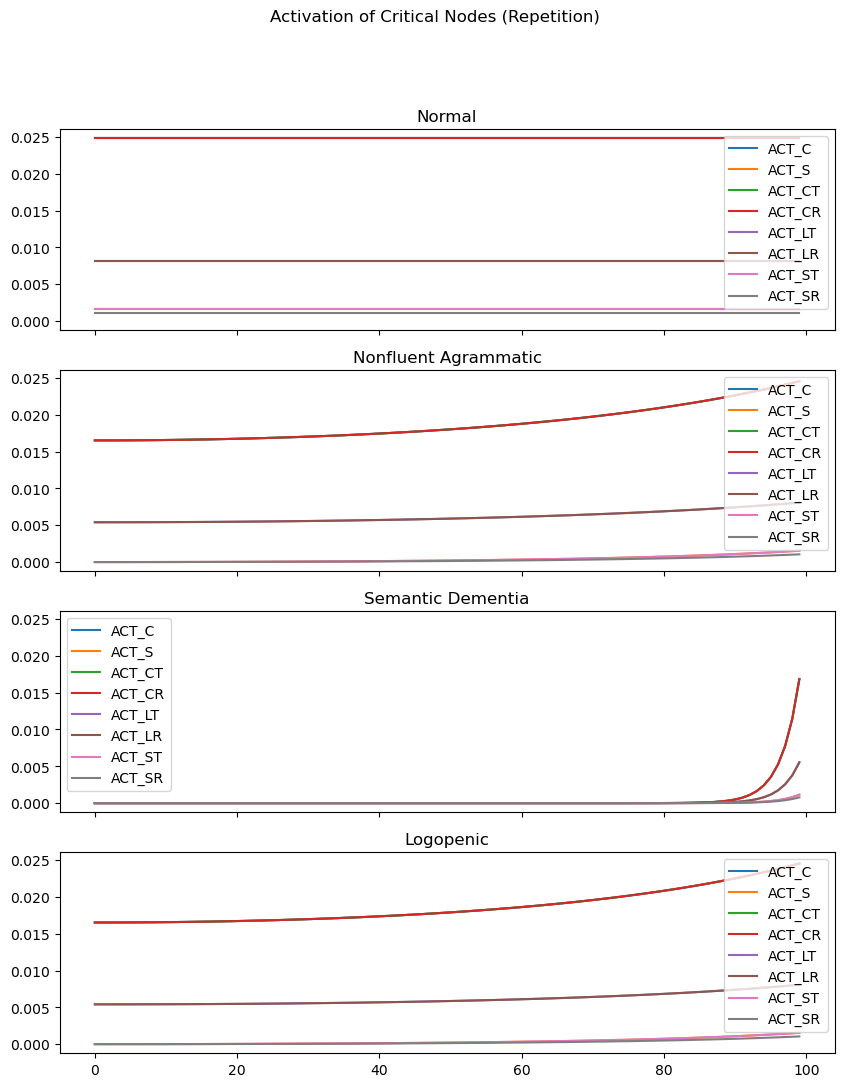

KeyboardInterrupt: Interrupted by user

In [6]:
m = Model()
m.main()

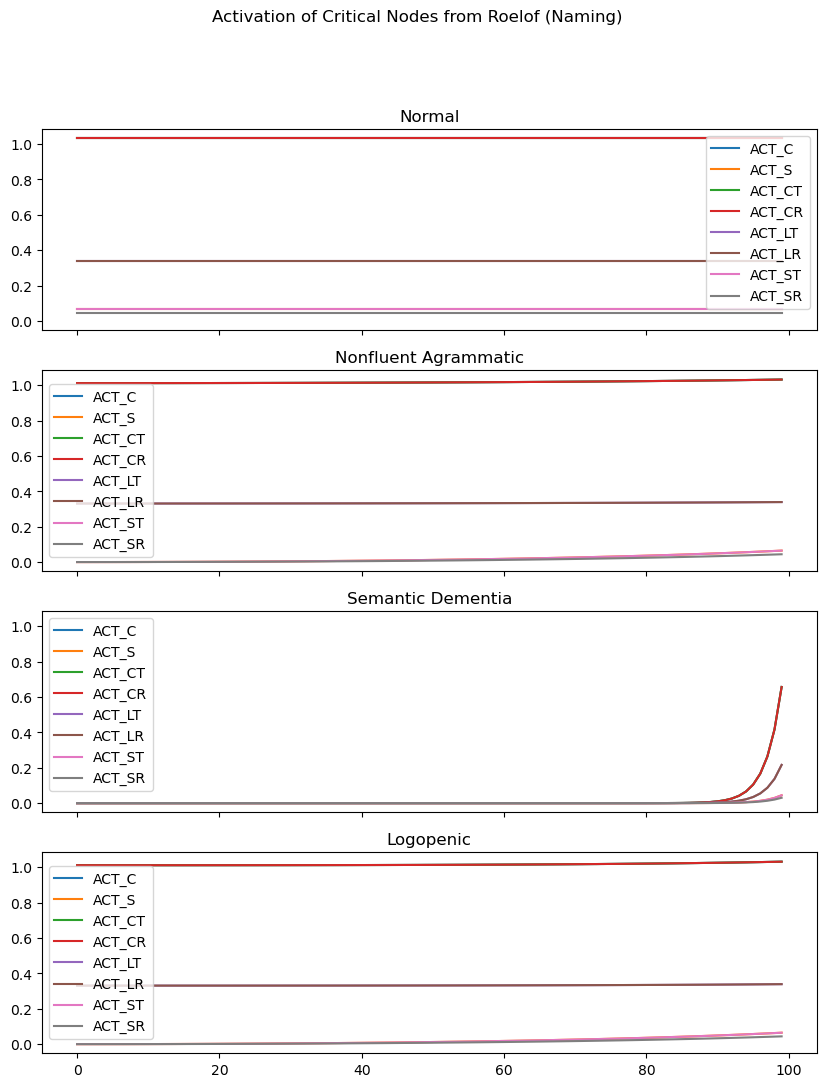

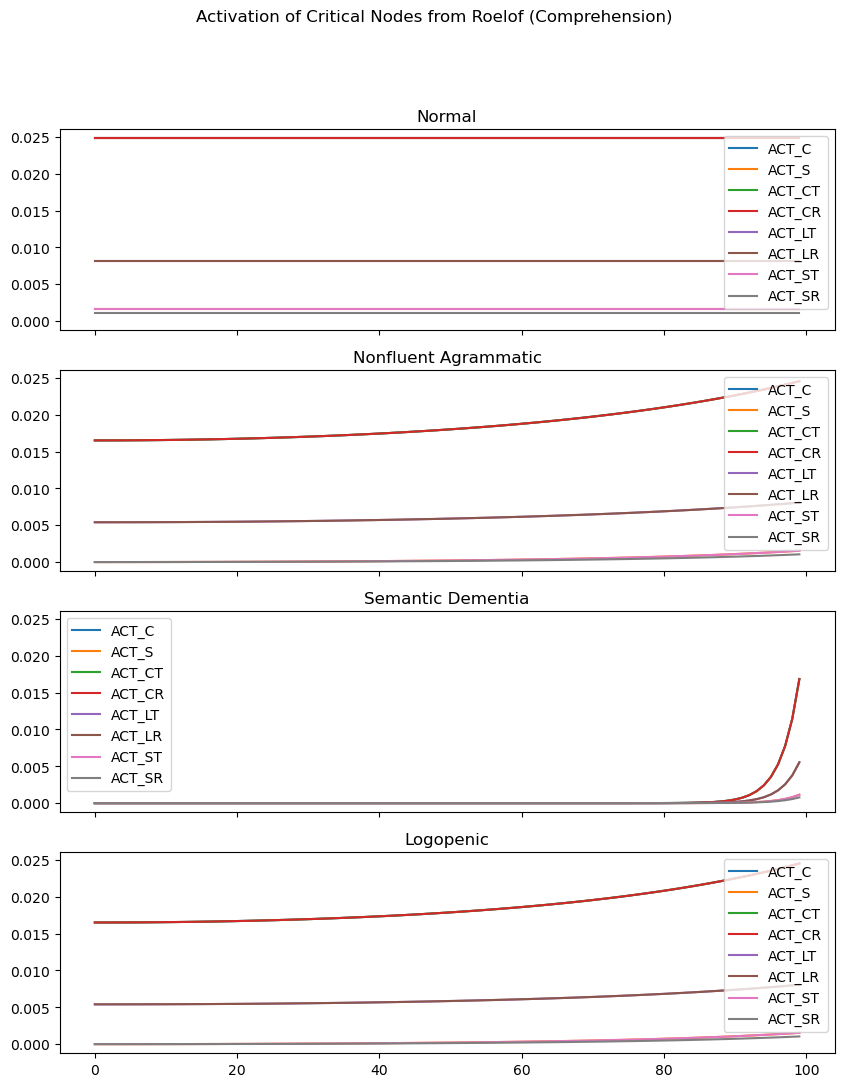

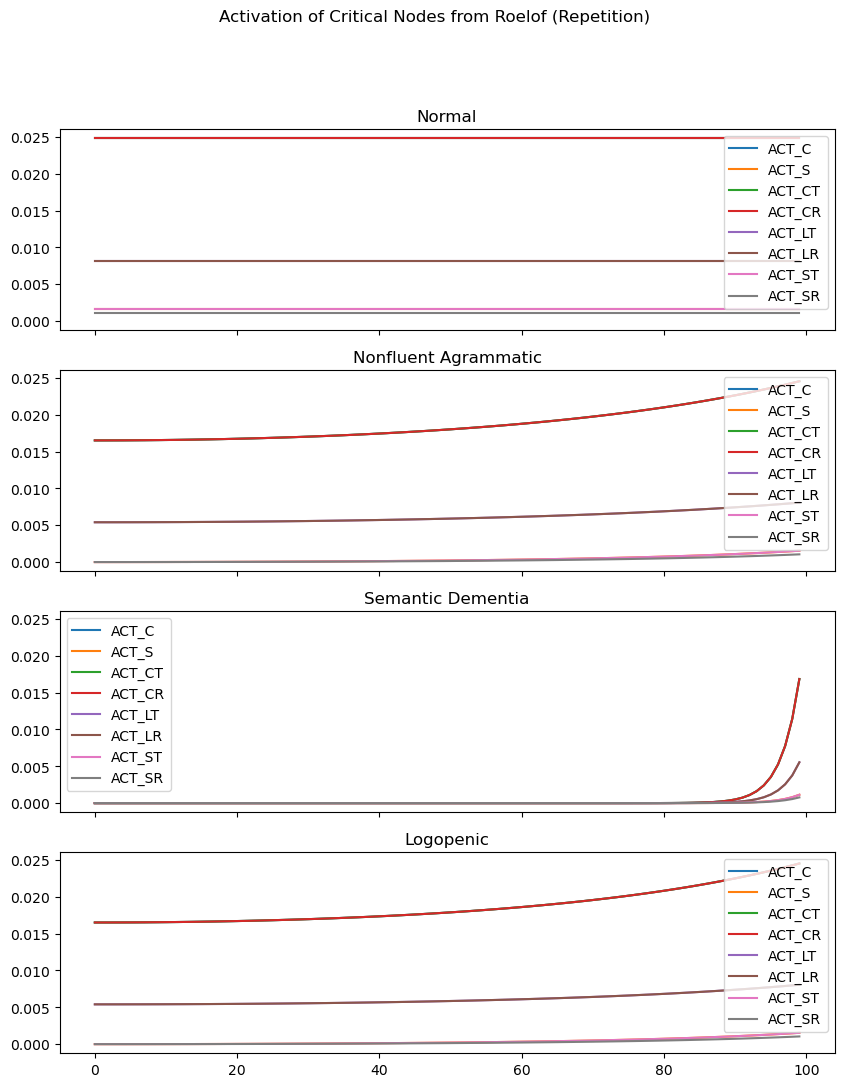

In [7]:
# Normal group
ACT_C_normal_naming = [ 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 ]
ACT_S_normal_naming = [ 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 ]
ACT_CT_normal_naming = [ 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 , 1.032038 ]
ACT_CR_normal_naming = [ 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 , 1.032042 ]
ACT_LT_normal_naming = [ 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 , 0.339307 ]
ACT_LR_normal_naming = [ 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 , 0.339325 ]
ACT_ST_normal_naming = [ 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 , 0.066689 ]
ACT_SR_normal_naming = [ 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 , 0.045440 ]

ACT_C_normal_comprehension = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_S_normal_comprehension = [ 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 ]
ACT_CT_normal_comprehension = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_CR_normal_comprehension = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_LT_normal_comprehension = [ 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 ]
ACT_LR_normal_comprehension = [ 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 ]
ACT_ST_normal_comprehension = [ 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 ]
ACT_SR_normal_comprehension = [ 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 ]

ACT_C_normal_repetition = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_S_normal_repetition = [ 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 ]
ACT_CT_normal_repetition = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_CR_normal_repetition = [ 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 , 0.024795 ]
ACT_LT_normal_repetition = [ 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 ]
ACT_LR_normal_repetition = [ 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 , 0.008152 ]
ACT_ST_normal_repetition = [ 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 , 0.001602 ]
ACT_SR_normal_repetition = [ 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 , 0.001092 ]

# Nonfluent agrammatic group
ACT_C_nonfluent_agrammatic_naming = [ 1.011234 , 1.011235 , 1.011239 , 1.011247 , 1.011257 , 1.011270 , 1.011285 , 1.011304 , 1.011326 , 1.011351 , 1.011378 , 1.011408 , 1.011442 , 1.011478 , 1.011518 , 1.011560 , 1.011605 , 1.011653 , 1.011705 , 1.011759 , 1.011817 , 1.011877 , 1.011941 , 1.012008 , 1.012078 , 1.012151 , 1.012228 , 1.012307 , 1.012390 , 1.012477 , 1.012566 , 1.012660 , 1.012756 , 1.012856 , 1.012960 , 1.013067 , 1.013177 , 1.013292 , 1.013410 , 1.013531 , 1.013657 , 1.013786 , 1.013920 , 1.014057 , 1.014198 , 1.014344 , 1.014493 , 1.014647 , 1.014805 , 1.014967 , 1.015134 , 1.015305 , 1.015481 , 1.015662 , 1.015847 , 1.016037 , 1.016232 , 1.016433 , 1.016638 , 1.016849 , 1.017064 , 1.017286 , 1.017513 , 1.017745 , 1.017984 , 1.018228 , 1.018479 , 1.018736 , 1.018999 , 1.019268 , 1.019545 , 1.019828 , 1.020118 , 1.020415 , 1.020720 , 1.021032 , 1.021352 , 1.021680 , 1.022016 , 1.022360 , 1.022713 , 1.023075 , 1.023446 , 1.023826 , 1.024216 , 1.024616 , 1.025026 , 1.025447 , 1.025878 , 1.026321 , 1.026775 , 1.027241 , 1.027719 , 1.028210 , 1.028714 , 1.029231 , 1.029763 , 1.030309 , 1.030870 , 1.031446 ]
ACT_S_nonfluent_agrammatic_naming = [ 0.000000 , 0.000004 , 0.000018 , 0.000040 , 0.000071 , 0.000111 , 0.000160 , 0.000218 , 0.000285 , 0.000361 , 0.000446 , 0.000540 , 0.000643 , 0.000755 , 0.000877 , 0.001008 , 0.001148 , 0.001297 , 0.001456 , 0.001624 , 0.001802 , 0.001989 , 0.002187 , 0.002394 , 0.002610 , 0.002837 , 0.003074 , 0.003321 , 0.003578 , 0.003846 , 0.004124 , 0.004413 , 0.004713 , 0.005023 , 0.005344 , 0.005677 , 0.006021 , 0.006376 , 0.006743 , 0.007122 , 0.007513 , 0.007916 , 0.008331 , 0.008759 , 0.009200 , 0.009654 , 0.010120 , 0.010601 , 0.011094 , 0.011602 , 0.012124 , 0.012661 , 0.013212 , 0.013778 , 0.014359 , 0.014956 , 0.015569 , 0.016199 , 0.016844 , 0.017507 , 0.018188 , 0.018886 , 0.019602 , 0.020337 , 0.021090 , 0.021864 , 0.022657 , 0.023470 , 0.024305 , 0.025161 , 0.026039 , 0.026940 , 0.027864 , 0.028812 , 0.029785 , 0.030782 , 0.031806 , 0.032856 , 0.033934 , 0.035039 , 0.036174 , 0.037339 , 0.038535 , 0.039762 , 0.041023 , 0.042317 , 0.043646 , 0.045012 , 0.046415 , 0.047856 , 0.049337 , 0.050860 , 0.052425 , 0.054035 , 0.055691 , 0.057394 , 0.059146 , 0.060950 , 0.062807 , 0.064720 ]
ACT_CT_nonfluent_agrammatic_naming = [ 1.011234 , 1.011235 , 1.011239 , 1.011247 , 1.011257 , 1.011270 , 1.011285 , 1.011304 , 1.011326 , 1.011351 , 1.011378 , 1.011408 , 1.011442 , 1.011478 , 1.011518 , 1.011560 , 1.011605 , 1.011653 , 1.011705 , 1.011759 , 1.011817 , 1.011877 , 1.011941 , 1.012008 , 1.012078 , 1.012151 , 1.012228 , 1.012307 , 1.012390 , 1.012477 , 1.012566 , 1.012660 , 1.012756 , 1.012856 , 1.012960 , 1.013067 , 1.013177 , 1.013292 , 1.013410 , 1.013531 , 1.013657 , 1.013786 , 1.013920 , 1.014057 , 1.014198 , 1.014344 , 1.014493 , 1.014647 , 1.014805 , 1.014967 , 1.015134 , 1.015305 , 1.015481 , 1.015662 , 1.015847 , 1.016037 , 1.016232 , 1.016433 , 1.016638 , 1.016849 , 1.017064 , 1.017286 , 1.017513 , 1.017745 , 1.017984 , 1.018228 , 1.018479 , 1.018736 , 1.018999 , 1.019268 , 1.019545 , 1.019828 , 1.020118 , 1.020415 , 1.020720 , 1.021032 , 1.021352 , 1.021680 , 1.022016 , 1.022360 , 1.022713 , 1.023075 , 1.023446 , 1.023826 , 1.024216 , 1.024616 , 1.025026 , 1.025447 , 1.025878 , 1.026321 , 1.026775 , 1.027241 , 1.027719 , 1.028210 , 1.028714 , 1.029231 , 1.029763 , 1.030309 , 1.030870 , 1.031446 ]
ACT_CR_nonfluent_agrammatic_naming = [ 1.011234 , 1.011235 , 1.011239 , 1.011247 , 1.011257 , 1.011270 , 1.011285 , 1.011304 , 1.011326 , 1.011351 , 1.011378 , 1.011408 , 1.011442 , 1.011478 , 1.011518 , 1.011560 , 1.011605 , 1.011653 , 1.011705 , 1.011759 , 1.011817 , 1.011877 , 1.011941 , 1.012008 , 1.012078 , 1.012151 , 1.012228 , 1.012307 , 1.012390 , 1.012477 , 1.012566 , 1.012660 , 1.012756 , 1.012856 , 1.012960 , 1.013067 , 1.013177 , 1.013292 , 1.013410 , 1.013531 , 1.013657 , 1.013786 , 1.013920 , 1.014057 , 1.014198 , 1.014344 , 1.014493 , 1.014647 , 1.014805 , 1.014967 , 1.015134 , 1.015305 , 1.015481 , 1.015662 , 1.015847 , 1.016038 , 1.016233 , 1.016433 , 1.016638 , 1.016849 , 1.017065 , 1.017286 , 1.017513 , 1.017746 , 1.017984 , 1.018229 , 1.018479 , 1.018736 , 1.018999 , 1.019269 , 1.019545 , 1.019828 , 1.020119 , 1.020416 , 1.020721 , 1.021033 , 1.021353 , 1.021681 , 1.022017 , 1.022361 , 1.022714 , 1.023076 , 1.023448 , 1.023828 , 1.024218 , 1.024618 , 1.025028 , 1.025449 , 1.025880 , 1.026323 , 1.026777 , 1.027243 , 1.027722 , 1.028213 , 1.028717 , 1.029234 , 1.029766 , 1.030312 , 1.030873 , 1.031450 ]
ACT_LT_nonfluent_agrammatic_naming = [ 0.330808 , 0.330808 , 0.330810 , 0.330813 , 0.330817 , 0.330822 , 0.330829 , 0.330836 , 0.330845 , 0.330855 , 0.330866 , 0.330879 , 0.330892 , 0.330907 , 0.330923 , 0.330940 , 0.330958 , 0.330978 , 0.330999 , 0.331021 , 0.331044 , 0.331069 , 0.331095 , 0.331122 , 0.331150 , 0.331180 , 0.331211 , 0.331243 , 0.331277 , 0.331312 , 0.331349 , 0.331386 , 0.331426 , 0.331466 , 0.331508 , 0.331552 , 0.331597 , 0.331643 , 0.331691 , 0.331740 , 0.331791 , 0.331844 , 0.331898 , 0.331954 , 0.332011 , 0.332070 , 0.332131 , 0.332194 , 0.332258 , 0.332324 , 0.332392 , 0.332461 , 0.332533 , 0.332606 , 0.332682 , 0.332759 , 0.332839 , 0.332920 , 0.333004 , 0.333089 , 0.333177 , 0.333267 , 0.333360 , 0.333455 , 0.333552 , 0.333651 , 0.333754 , 0.333858 , 0.333965 , 0.334075 , 0.334188 , 0.334304 , 0.334422 , 0.334543 , 0.334668 , 0.334795 , 0.334926 , 0.335060 , 0.335197 , 0.335338 , 0.335482 , 0.335630 , 0.335782 , 0.335937 , 0.336097 , 0.336261 , 0.336428 , 0.336601 , 0.336777 , 0.336959 , 0.337145 , 0.337336 , 0.337532 , 0.337734 , 0.337940 , 0.338153 , 0.338371 , 0.338596 , 0.338826 , 0.339063 ]
ACT_LR_nonfluent_agrammatic_naming = [ 0.330808 , 0.330808 , 0.330810 , 0.330813 , 0.330817 , 0.330822 , 0.330829 , 0.330836 , 0.330845 , 0.330855 , 0.330866 , 0.330879 , 0.330892 , 0.330907 , 0.330923 , 0.330940 , 0.330958 , 0.330978 , 0.330999 , 0.331021 , 0.331044 , 0.331069 , 0.331095 , 0.331122 , 0.331150 , 0.331180 , 0.331211 , 0.331243 , 0.331277 , 0.331312 , 0.331349 , 0.331386 , 0.331426 , 0.331466 , 0.331508 , 0.331552 , 0.331597 , 0.331643 , 0.331691 , 0.331741 , 0.331792 , 0.331844 , 0.331898 , 0.331954 , 0.332012 , 0.332071 , 0.332132 , 0.332194 , 0.332258 , 0.332325 , 0.332392 , 0.332462 , 0.332534 , 0.332607 , 0.332683 , 0.332760 , 0.332840 , 0.332921 , 0.333005 , 0.333091 , 0.333179 , 0.333269 , 0.333362 , 0.333456 , 0.333554 , 0.333653 , 0.333756 , 0.333861 , 0.333968 , 0.334078 , 0.334191 , 0.334307 , 0.334425 , 0.334547 , 0.334671 , 0.334799 , 0.334930 , 0.335064 , 0.335202 , 0.335343 , 0.335488 , 0.335636 , 0.335788 , 0.335944 , 0.336104 , 0.336268 , 0.336436 , 0.336609 , 0.336786 , 0.336968 , 0.337155 , 0.337347 , 0.337544 , 0.337746 , 0.337953 , 0.338167 , 0.338386 , 0.338611 , 0.338843 , 0.339081 ]
ACT_ST_nonfluent_agrammatic_naming = [ 0.000000 , 0.000004 , 0.000018 , 0.000040 , 0.000071 , 0.000111 , 0.000160 , 0.000218 , 0.000285 , 0.000361 , 0.000446 , 0.000540 , 0.000643 , 0.000755 , 0.000877 , 0.001008 , 0.001148 , 0.001297 , 0.001456 , 0.001624 , 0.001802 , 0.001989 , 0.002187 , 0.002394 , 0.002610 , 0.002837 , 0.003074 , 0.003321 , 0.003578 , 0.003846 , 0.004124 , 0.004413 , 0.004713 , 0.005023 , 0.005344 , 0.005677 , 0.006021 , 0.006376 , 0.006743 , 0.007122 , 0.007513 , 0.007916 , 0.008331 , 0.008759 , 0.009200 , 0.009654 , 0.010120 , 0.010601 , 0.011094 , 0.011602 , 0.012124 , 0.012661 , 0.013212 , 0.013778 , 0.014359 , 0.014956 , 0.015569 , 0.016199 , 0.016844 , 0.017507 , 0.018188 , 0.018886 , 0.019602 , 0.020337 , 0.021090 , 0.021864 , 0.022657 , 0.023470 , 0.024305 , 0.025161 , 0.026039 , 0.026940 , 0.027864 , 0.028812 , 0.029785 , 0.030782 , 0.031806 , 0.032856 , 0.033934 , 0.035039 , 0.036174 , 0.037339 , 0.038535 , 0.039762 , 0.041023 , 0.042317 , 0.043646 , 0.045012 , 0.046415 , 0.047856 , 0.049337 , 0.050860 , 0.052425 , 0.054035 , 0.055691 , 0.057394 , 0.059146 , 0.060950 , 0.062807 , 0.064720 ]
ACT_SR_nonfluent_agrammatic_naming = [ 0.000000 , 0.000003 , 0.000012 , 0.000027 , 0.000047 , 0.000074 , 0.000107 , 0.000145 , 0.000190 , 0.000241 , 0.000297 , 0.000360 , 0.000429 , 0.000504 , 0.000585 , 0.000672 , 0.000765 , 0.000865 , 0.000971 , 0.001083 , 0.001202 , 0.001327 , 0.001459 , 0.001597 , 0.001742 , 0.001893 , 0.002052 , 0.002217 , 0.002389 , 0.002567 , 0.002753 , 0.002947 , 0.003147 , 0.003355 , 0.003570 , 0.003792 , 0.004022 , 0.004260 , 0.004506 , 0.004760 , 0.005022 , 0.005292 , 0.005570 , 0.005857 , 0.006153 , 0.006457 , 0.006771 , 0.007093 , 0.007425 , 0.007766 , 0.008117 , 0.008477 , 0.008848 , 0.009229 , 0.009620 , 0.010022 , 0.010435 , 0.010859 , 0.011295 , 0.011742 , 0.012201 , 0.012672 , 0.013156 , 0.013653 , 0.014162 , 0.014685 , 0.015222 , 0.015773 , 0.016338 , 0.016919 , 0.017514 , 0.018126 , 0.018753 , 0.019397 , 0.020058 , 0.020737 , 0.021433 , 0.022149 , 0.022883 , 0.023638 , 0.024412 , 0.025208 , 0.026025 , 0.026865 , 0.027728 , 0.028614 , 0.029526 , 0.030463 , 0.031426 , 0.032417 , 0.033436 , 0.034484 , 0.035563 , 0.036674 , 0.037817 , 0.038994 , 0.040207 , 0.041457 , 0.042744 , 0.044072 ]

ACT_C_nonfluent_agrammatic_comprehension = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023860 , 0.024084 , 0.024314 , 0.024551 ]
ACT_S_nonfluent_agrammatic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000056 , 0.000060 , 0.000065 , 0.000069 , 0.000074 , 0.000080 , 0.000085 , 0.000091 , 0.000097 , 0.000103 , 0.000109 , 0.000115 , 0.000122 , 0.000129 , 0.000137 , 0.000144 , 0.000152 , 0.000160 , 0.000169 , 0.000177 , 0.000186 , 0.000196 , 0.000205 , 0.000215 , 0.000226 , 0.000236 , 0.000247 , 0.000259 , 0.000271 , 0.000283 , 0.000295 , 0.000308 , 0.000322 , 0.000336 , 0.000350 , 0.000365 , 0.000381 , 0.000397 , 0.000413 , 0.000430 , 0.000448 , 0.000466 , 0.000485 , 0.000505 , 0.000525 , 0.000546 , 0.000567 , 0.000590 , 0.000613 , 0.000637 , 0.000662 , 0.000688 , 0.000715 , 0.000743 , 0.000772 , 0.000802 , 0.000833 , 0.000866 , 0.000899 , 0.000934 , 0.000970 , 0.001008 , 0.001047 , 0.001088 , 0.001131 , 0.001175 , 0.001221 , 0.001269 , 0.001318 , 0.001371 , 0.001425 , 0.001481 , 0.001541 ]
ACT_CT_nonfluent_agrammatic_comprehension = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023860 , 0.024084 , 0.024314 , 0.024551 ]
ACT_CR_nonfluent_agrammatic_comprehension = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023861 , 0.024084 , 0.024314 , 0.024551 ]
ACT_LT_nonfluent_agrammatic_comprehension = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005407 , 0.005408 , 0.005410 , 0.005413 , 0.005415 , 0.005419 , 0.005422 , 0.005426 , 0.005430 , 0.005435 , 0.005440 , 0.005445 , 0.005451 , 0.005457 , 0.005464 , 0.005470 , 0.005478 , 0.005485 , 0.005494 , 0.005502 , 0.005511 , 0.005520 , 0.005530 , 0.005540 , 0.005551 , 0.005562 , 0.005573 , 0.005585 , 0.005597 , 0.005610 , 0.005623 , 0.005637 , 0.005651 , 0.005666 , 0.005681 , 0.005696 , 0.005712 , 0.005729 , 0.005746 , 0.005764 , 0.005782 , 0.005800 , 0.005820 , 0.005839 , 0.005860 , 0.005881 , 0.005902 , 0.005924 , 0.005947 , 0.005970 , 0.005994 , 0.006019 , 0.006044 , 0.006070 , 0.006096 , 0.006124 , 0.006152 , 0.006180 , 0.006210 , 0.006240 , 0.006271 , 0.006303 , 0.006336 , 0.006369 , 0.006403 , 0.006439 , 0.006475 , 0.006512 , 0.006550 , 0.006589 , 0.006629 , 0.006670 , 0.006712 , 0.006756 , 0.006800 , 0.006846 , 0.006892 , 0.006940 , 0.006990 , 0.007040 , 0.007092 , 0.007146 , 0.007201 , 0.007257 , 0.007315 , 0.007374 , 0.007435 , 0.007498 , 0.007563 , 0.007629 , 0.007698 , 0.007768 , 0.007840 , 0.007915 , 0.007992 , 0.008071 ]
ACT_LR_nonfluent_agrammatic_comprehension = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005407 , 0.005408 , 0.005410 , 0.005413 , 0.005415 , 0.005419 , 0.005422 , 0.005426 , 0.005430 , 0.005435 , 0.005440 , 0.005445 , 0.005451 , 0.005457 , 0.005464 , 0.005470 , 0.005478 , 0.005485 , 0.005494 , 0.005502 , 0.005511 , 0.005520 , 0.005530 , 0.005540 , 0.005551 , 0.005562 , 0.005573 , 0.005585 , 0.005597 , 0.005610 , 0.005623 , 0.005637 , 0.005651 , 0.005666 , 0.005681 , 0.005696 , 0.005712 , 0.005729 , 0.005746 , 0.005764 , 0.005782 , 0.005800 , 0.005820 , 0.005839 , 0.005860 , 0.005881 , 0.005902 , 0.005924 , 0.005947 , 0.005970 , 0.005994 , 0.006019 , 0.006044 , 0.006070 , 0.006096 , 0.006124 , 0.006152 , 0.006180 , 0.006210 , 0.006240 , 0.006271 , 0.006303 , 0.006336 , 0.006369 , 0.006403 , 0.006439 , 0.006475 , 0.006512 , 0.006550 , 0.006589 , 0.006629 , 0.006670 , 0.006712 , 0.006756 , 0.006800 , 0.006846 , 0.006893 , 0.006941 , 0.006990 , 0.007040 , 0.007092 , 0.007146 , 0.007201 , 0.007257 , 0.007315 , 0.007374 , 0.007436 , 0.007498 , 0.007563 , 0.007630 , 0.007698 , 0.007768 , 0.007841 , 0.007915 , 0.007992 , 0.008071 ]
ACT_ST_nonfluent_agrammatic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000056 , 0.000060 , 0.000065 , 0.000069 , 0.000074 , 0.000080 , 0.000085 , 0.000091 , 0.000097 , 0.000103 , 0.000109 , 0.000115 , 0.000122 , 0.000129 , 0.000137 , 0.000144 , 0.000152 , 0.000160 , 0.000169 , 0.000177 , 0.000186 , 0.000196 , 0.000205 , 0.000215 , 0.000226 , 0.000236 , 0.000247 , 0.000259 , 0.000271 , 0.000283 , 0.000295 , 0.000308 , 0.000322 , 0.000336 , 0.000350 , 0.000365 , 0.000381 , 0.000397 , 0.000413 , 0.000430 , 0.000448 , 0.000466 , 0.000485 , 0.000505 , 0.000525 , 0.000546 , 0.000567 , 0.000590 , 0.000613 , 0.000637 , 0.000662 , 0.000688 , 0.000715 , 0.000743 , 0.000772 , 0.000802 , 0.000833 , 0.000866 , 0.000899 , 0.000934 , 0.000970 , 0.001008 , 0.001047 , 0.001088 , 0.001131 , 0.001175 , 0.001221 , 0.001269 , 0.001318 , 0.001371 , 0.001425 , 0.001481 , 0.001541 ]
ACT_SR_nonfluent_agrammatic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000008 , 0.000010 , 0.000011 , 0.000013 , 0.000014 , 0.000016 , 0.000018 , 0.000020 , 0.000022 , 0.000024 , 0.000027 , 0.000029 , 0.000032 , 0.000034 , 0.000037 , 0.000040 , 0.000043 , 0.000046 , 0.000050 , 0.000053 , 0.000057 , 0.000061 , 0.000064 , 0.000069 , 0.000073 , 0.000077 , 0.000082 , 0.000086 , 0.000091 , 0.000096 , 0.000102 , 0.000107 , 0.000113 , 0.000119 , 0.000125 , 0.000131 , 0.000137 , 0.000144 , 0.000151 , 0.000158 , 0.000166 , 0.000173 , 0.000181 , 0.000189 , 0.000198 , 0.000207 , 0.000216 , 0.000225 , 0.000235 , 0.000245 , 0.000255 , 0.000266 , 0.000277 , 0.000289 , 0.000301 , 0.000313 , 0.000326 , 0.000339 , 0.000353 , 0.000367 , 0.000382 , 0.000397 , 0.000413 , 0.000430 , 0.000447 , 0.000464 , 0.000483 , 0.000502 , 0.000521 , 0.000542 , 0.000563 , 0.000585 , 0.000608 , 0.000632 , 0.000657 , 0.000683 , 0.000709 , 0.000737 , 0.000767 , 0.000797 , 0.000828 , 0.000861 , 0.000896 , 0.000932 , 0.000969 , 0.001008 , 0.001049 ]

ACT_C_nonfluent_agrammatic_repetition = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023860 , 0.024084 , 0.024314 , 0.024551 ]
ACT_S_nonfluent_agrammatic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000056 , 0.000060 , 0.000065 , 0.000069 , 0.000074 , 0.000080 , 0.000085 , 0.000091 , 0.000097 , 0.000103 , 0.000109 , 0.000115 , 0.000122 , 0.000129 , 0.000137 , 0.000144 , 0.000152 , 0.000160 , 0.000169 , 0.000177 , 0.000186 , 0.000196 , 0.000205 , 0.000215 , 0.000226 , 0.000236 , 0.000247 , 0.000259 , 0.000271 , 0.000283 , 0.000295 , 0.000308 , 0.000322 , 0.000336 , 0.000350 , 0.000365 , 0.000381 , 0.000397 , 0.000413 , 0.000430 , 0.000448 , 0.000466 , 0.000485 , 0.000505 , 0.000525 , 0.000546 , 0.000567 , 0.000590 , 0.000613 , 0.000637 , 0.000662 , 0.000688 , 0.000715 , 0.000743 , 0.000772 , 0.000802 , 0.000833 , 0.000866 , 0.000899 , 0.000934 , 0.000970 , 0.001008 , 0.001047 , 0.001088 , 0.001131 , 0.001175 , 0.001221 , 0.001269 , 0.001318 , 0.001371 , 0.001425 , 0.001481 , 0.001541 ]
ACT_CT_nonfluent_agrammatic_repetition = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023860 , 0.024084 , 0.024314 , 0.024551 ]
ACT_CR_nonfluent_agrammatic_repetition = [ 0.016518 , 0.016519 , 0.016521 , 0.016523 , 0.016527 , 0.016532 , 0.016538 , 0.016545 , 0.016554 , 0.016563 , 0.016574 , 0.016585 , 0.016598 , 0.016612 , 0.016627 , 0.016644 , 0.016661 , 0.016680 , 0.016699 , 0.016720 , 0.016742 , 0.016766 , 0.016790 , 0.016816 , 0.016843 , 0.016871 , 0.016900 , 0.016931 , 0.016963 , 0.016996 , 0.017031 , 0.017067 , 0.017104 , 0.017143 , 0.017183 , 0.017224 , 0.017267 , 0.017311 , 0.017357 , 0.017404 , 0.017452 , 0.017502 , 0.017554 , 0.017607 , 0.017662 , 0.017718 , 0.017776 , 0.017836 , 0.017897 , 0.017960 , 0.018025 , 0.018092 , 0.018160 , 0.018231 , 0.018303 , 0.018377 , 0.018453 , 0.018531 , 0.018612 , 0.018694 , 0.018778 , 0.018865 , 0.018954 , 0.019045 , 0.019139 , 0.019235 , 0.019333 , 0.019434 , 0.019538 , 0.019644 , 0.019753 , 0.019865 , 0.019980 , 0.020098 , 0.020218 , 0.020342 , 0.020469 , 0.020600 , 0.020733 , 0.020871 , 0.021011 , 0.021156 , 0.021304 , 0.021457 , 0.021613 , 0.021774 , 0.021939 , 0.022108 , 0.022282 , 0.022461 , 0.022644 , 0.022833 , 0.023027 , 0.023227 , 0.023432 , 0.023643 , 0.023861 , 0.024084 , 0.024314 , 0.024551 ]
ACT_LT_nonfluent_agrammatic_repetition = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005407 , 0.005408 , 0.005410 , 0.005413 , 0.005415 , 0.005419 , 0.005422 , 0.005426 , 0.005430 , 0.005435 , 0.005440 , 0.005445 , 0.005451 , 0.005457 , 0.005464 , 0.005470 , 0.005478 , 0.005485 , 0.005494 , 0.005502 , 0.005511 , 0.005520 , 0.005530 , 0.005540 , 0.005551 , 0.005562 , 0.005573 , 0.005585 , 0.005597 , 0.005610 , 0.005623 , 0.005637 , 0.005651 , 0.005666 , 0.005681 , 0.005696 , 0.005712 , 0.005729 , 0.005746 , 0.005764 , 0.005782 , 0.005800 , 0.005820 , 0.005839 , 0.005860 , 0.005881 , 0.005902 , 0.005924 , 0.005947 , 0.005970 , 0.005994 , 0.006019 , 0.006044 , 0.006070 , 0.006096 , 0.006124 , 0.006152 , 0.006180 , 0.006210 , 0.006240 , 0.006271 , 0.006303 , 0.006336 , 0.006369 , 0.006403 , 0.006439 , 0.006475 , 0.006512 , 0.006550 , 0.006589 , 0.006629 , 0.006670 , 0.006712 , 0.006756 , 0.006800 , 0.006846 , 0.006892 , 0.006940 , 0.006990 , 0.007040 , 0.007092 , 0.007146 , 0.007201 , 0.007257 , 0.007315 , 0.007374 , 0.007435 , 0.007498 , 0.007563 , 0.007629 , 0.007698 , 0.007768 , 0.007840 , 0.007915 , 0.007992 , 0.008071 ]
ACT_LR_nonfluent_agrammatic_repetition = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005407 , 0.005408 , 0.005410 , 0.005413 , 0.005415 , 0.005419 , 0.005422 , 0.005426 , 0.005430 , 0.005435 , 0.005440 , 0.005445 , 0.005451 , 0.005457 , 0.005464 , 0.005470 , 0.005478 , 0.005485 , 0.005494 , 0.005502 , 0.005511 , 0.005520 , 0.005530 , 0.005540 , 0.005551 , 0.005562 , 0.005573 , 0.005585 , 0.005597 , 0.005610 , 0.005623 , 0.005637 , 0.005651 , 0.005666 , 0.005681 , 0.005696 , 0.005712 , 0.005729 , 0.005746 , 0.005764 , 0.005782 , 0.005800 , 0.005820 , 0.005839 , 0.005860 , 0.005881 , 0.005902 , 0.005924 , 0.005947 , 0.005970 , 0.005994 , 0.006019 , 0.006044 , 0.006070 , 0.006096 , 0.006124 , 0.006152 , 0.006180 , 0.006210 , 0.006240 , 0.006271 , 0.006303 , 0.006336 , 0.006369 , 0.006403 , 0.006439 , 0.006475 , 0.006512 , 0.006550 , 0.006589 , 0.006629 , 0.006670 , 0.006712 , 0.006756 , 0.006800 , 0.006846 , 0.006893 , 0.006941 , 0.006990 , 0.007040 , 0.007092 , 0.007146 , 0.007201 , 0.007257 , 0.007315 , 0.007374 , 0.007436 , 0.007498 , 0.007563 , 0.007630 , 0.007698 , 0.007768 , 0.007841 , 0.007915 , 0.007992 , 0.008071 ]
ACT_ST_nonfluent_agrammatic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000056 , 0.000060 , 0.000065 , 0.000069 , 0.000074 , 0.000080 , 0.000085 , 0.000091 , 0.000097 , 0.000103 , 0.000109 , 0.000115 , 0.000122 , 0.000129 , 0.000137 , 0.000144 , 0.000152 , 0.000160 , 0.000169 , 0.000177 , 0.000186 , 0.000196 , 0.000205 , 0.000215 , 0.000226 , 0.000236 , 0.000247 , 0.000259 , 0.000271 , 0.000283 , 0.000295 , 0.000308 , 0.000322 , 0.000336 , 0.000350 , 0.000365 , 0.000381 , 0.000397 , 0.000413 , 0.000430 , 0.000448 , 0.000466 , 0.000485 , 0.000505 , 0.000525 , 0.000546 , 0.000567 , 0.000590 , 0.000613 , 0.000637 , 0.000662 , 0.000688 , 0.000715 , 0.000743 , 0.000772 , 0.000802 , 0.000833 , 0.000866 , 0.000899 , 0.000934 , 0.000970 , 0.001008 , 0.001047 , 0.001088 , 0.001131 , 0.001175 , 0.001221 , 0.001269 , 0.001318 , 0.001371 , 0.001425 , 0.001481 , 0.001541 ]
ACT_SR_nonfluent_agrammatic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000008 , 0.000010 , 0.000011 , 0.000013 , 0.000014 , 0.000016 , 0.000018 , 0.000020 , 0.000022 , 0.000024 , 0.000027 , 0.000029 , 0.000032 , 0.000034 , 0.000037 , 0.000040 , 0.000043 , 0.000046 , 0.000050 , 0.000053 , 0.000057 , 0.000061 , 0.000064 , 0.000069 , 0.000073 , 0.000077 , 0.000082 , 0.000086 , 0.000091 , 0.000096 , 0.000102 , 0.000107 , 0.000113 , 0.000119 , 0.000125 , 0.000131 , 0.000137 , 0.000144 , 0.000151 , 0.000158 , 0.000166 , 0.000173 , 0.000181 , 0.000189 , 0.000198 , 0.000207 , 0.000216 , 0.000225 , 0.000235 , 0.000245 , 0.000255 , 0.000266 , 0.000277 , 0.000289 , 0.000301 , 0.000313 , 0.000326 , 0.000339 , 0.000353 , 0.000367 , 0.000382 , 0.000397 , 0.000413 , 0.000430 , 0.000447 , 0.000464 , 0.000483 , 0.000502 , 0.000521 , 0.000542 , 0.000563 , 0.000585 , 0.000608 , 0.000632 , 0.000657 , 0.000683 , 0.000709 , 0.000737 , 0.000767 , 0.000797 , 0.000828 , 0.000861 , 0.000896 , 0.000932 , 0.000969 , 0.001008 , 0.001049 ]

# Semantic dementia group
ACT_C_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000006 , 0.000010 , 0.000016 , 0.000027 , 0.000045 , 0.000074 , 0.000122 , 0.000201 , 0.000331 , 0.000542 , 0.000887 , 0.001446 , 0.002352 , 0.003815 , 0.006173 , 0.009959 , 0.016027 , 0.025722 , 0.041175 , 0.065740 , 0.104689 , 0.166285 , 0.263452 , 0.416343 , 0.656316 ]
ACT_S_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000004 , 0.000006 , 0.000009 , 0.000014 , 0.000021 , 0.000032 , 0.000050 , 0.000077 , 0.000118 , 0.000182 , 0.000280 , 0.000430 , 0.000660 , 0.001012 , 0.001549 , 0.002367 , 0.003612 , 0.005504 , 0.008375 , 0.012724 , 0.019299 , 0.029226 , 0.044185 ]
ACT_CT_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000006 , 0.000010 , 0.000016 , 0.000027 , 0.000045 , 0.000074 , 0.000122 , 0.000201 , 0.000331 , 0.000542 , 0.000887 , 0.001446 , 0.002352 , 0.003815 , 0.006173 , 0.009959 , 0.016027 , 0.025722 , 0.041175 , 0.065740 , 0.104689 , 0.166285 , 0.263452 , 0.416343 , 0.656316 ]
ACT_CR_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000006 , 0.000010 , 0.000016 , 0.000027 , 0.000045 , 0.000074 , 0.000122 , 0.000201 , 0.000331 , 0.000542 , 0.000887 , 0.001446 , 0.002352 , 0.003815 , 0.006173 , 0.009959 , 0.016027 , 0.025722 , 0.041176 , 0.065740 , 0.104689 , 0.166286 , 0.263454 , 0.416346 , 0.656319 ]
ACT_LT_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000009 , 0.000015 , 0.000025 , 0.000041 , 0.000067 , 0.000110 , 0.000180 , 0.000294 , 0.000479 , 0.000779 , 0.001262 , 0.002040 , 0.003290 , 0.005290 , 0.008486 , 0.013576 , 0.021664 , 0.034483 , 0.054748 , 0.086705 , 0.136972 , 0.215847 ]
ACT_LR_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000009 , 0.000015 , 0.000025 , 0.000041 , 0.000067 , 0.000110 , 0.000180 , 0.000294 , 0.000479 , 0.000779 , 0.001263 , 0.002041 , 0.003290 , 0.005291 , 0.008487 , 0.013577 , 0.021666 , 0.034486 , 0.054753 , 0.086711 , 0.136982 , 0.215860 ]
ACT_ST_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000004 , 0.000006 , 0.000009 , 0.000014 , 0.000021 , 0.000032 , 0.000050 , 0.000077 , 0.000118 , 0.000182 , 0.000280 , 0.000430 , 0.000660 , 0.001012 , 0.001549 , 0.002367 , 0.003612 , 0.005504 , 0.008375 , 0.012724 , 0.019299 , 0.029226 , 0.044185 ]
ACT_SR_semantic_dementia_naming = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000015 , 0.000023 , 0.000035 , 0.000054 , 0.000083 , 0.000127 , 0.000195 , 0.000299 , 0.000458 , 0.000700 , 0.001069 , 0.001631 , 0.002485 , 0.003781 , 0.005744 , 0.008713 , 0.013198 , 0.019960 , 0.030140 ]

ACT_C_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_S_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000026 , 0.000036 , 0.000051 , 0.000072 , 0.000101 , 0.000143 , 0.000201 , 0.000285 , 0.000402 , 0.000568 , 0.000803 , 0.001134 ]
ACT_CT_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_CR_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_LT_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000007 , 0.000010 , 0.000015 , 0.000023 , 0.000034 , 0.000050 , 0.000075 , 0.000111 , 0.000165 , 0.000244 , 0.000362 , 0.000536 , 0.000792 , 0.001171 , 0.001729 , 0.002552 , 0.003762 , 0.005541 ]
ACT_LR_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000007 , 0.000010 , 0.000015 , 0.000023 , 0.000034 , 0.000050 , 0.000075 , 0.000111 , 0.000165 , 0.000244 , 0.000362 , 0.000536 , 0.000792 , 0.001171 , 0.001730 , 0.002552 , 0.003762 , 0.005541 ]
ACT_ST_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000026 , 0.000036 , 0.000051 , 0.000072 , 0.000101 , 0.000143 , 0.000201 , 0.000285 , 0.000402 , 0.000568 , 0.000803 , 0.001134 ]
ACT_SR_semantic_dementia_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000003 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000025 , 0.000035 , 0.000050 , 0.000070 , 0.000098 , 0.000138 , 0.000195 , 0.000275 , 0.000389 , 0.000548 , 0.000774 ]

ACT_C_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_S_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000026 , 0.000036 , 0.000051 , 0.000072 , 0.000101 , 0.000143 , 0.000201 , 0.000285 , 0.000402 , 0.000568 , 0.000803 , 0.001134 ]
ACT_CT_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_CR_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000006 , 0.000010 , 0.000014 , 0.000021 , 0.000031 , 0.000046 , 0.000069 , 0.000103 , 0.000152 , 0.000226 , 0.000336 , 0.000499 , 0.000740 , 0.001097 , 0.001624 , 0.002404 , 0.003555 , 0.005253 , 0.007754 , 0.011435 , 0.016847 ]
ACT_LT_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000007 , 0.000010 , 0.000015 , 0.000023 , 0.000034 , 0.000050 , 0.000075 , 0.000111 , 0.000165 , 0.000244 , 0.000362 , 0.000536 , 0.000792 , 0.001171 , 0.001729 , 0.002552 , 0.003762 , 0.005541 ]
ACT_LR_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000005 , 0.000007 , 0.000010 , 0.000015 , 0.000023 , 0.000034 , 0.000050 , 0.000075 , 0.000111 , 0.000165 , 0.000244 , 0.000362 , 0.000536 , 0.000792 , 0.001171 , 0.001730 , 0.002552 , 0.003762 , 0.005541 ]
ACT_ST_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000026 , 0.000036 , 0.000051 , 0.000072 , 0.000101 , 0.000143 , 0.000201 , 0.000285 , 0.000402 , 0.000568 , 0.000803 , 0.001134 ]
ACT_SR_semantic_dementia_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000003 , 0.000005 , 0.000007 , 0.000009 , 0.000013 , 0.000018 , 0.000025 , 0.000035 , 0.000050 , 0.000070 , 0.000098 , 0.000138 , 0.000195 , 0.000275 , 0.000389 , 0.000548 , 0.000774 ]

# Logopenic group
ACT_C_logopenic_naming = [ 1.011234 , 1.011234 , 1.011234 , 1.011234 , 1.011235 , 1.011235 , 1.011237 , 1.011239 , 1.011241 , 1.011244 , 1.011248 , 1.011253 , 1.011259 , 1.011265 , 1.011273 , 1.011282 , 1.011293 , 1.011305 , 1.011318 , 1.011333 , 1.011350 , 1.011369 , 1.011389 , 1.011411 , 1.011436 , 1.011463 , 1.011492 , 1.011523 , 1.011557 , 1.011593 , 1.011632 , 1.011674 , 1.011719 , 1.011767 , 1.011819 , 1.011873 , 1.011931 , 1.011992 , 1.012057 , 1.012126 , 1.012199 , 1.012276 , 1.012357 , 1.012442 , 1.012532 , 1.012626 , 1.012725 , 1.012829 , 1.012939 , 1.013053 , 1.013173 , 1.013298 , 1.013429 , 1.013567 , 1.013710 , 1.013859 , 1.014015 , 1.014178 , 1.014348 , 1.014525 , 1.014709 , 1.014900 , 1.015100 , 1.015308 , 1.015524 , 1.015748 , 1.015982 , 1.016224 , 1.016476 , 1.016738 , 1.017010 , 1.017292 , 1.017585 , 1.017888 , 1.018204 , 1.018531 , 1.018870 , 1.019222 , 1.019587 , 1.019965 , 1.020357 , 1.020763 , 1.021185 , 1.021622 , 1.022074 , 1.022543 , 1.023030 , 1.023534 , 1.024056 , 1.024597 , 1.025159 , 1.025740 , 1.026343 , 1.026968 , 1.027616 , 1.028287 , 1.028984 , 1.029706 , 1.030455 , 1.031232 ]
ACT_S_logopenic_naming = [ 0.000000 , 0.000004 , 0.000018 , 0.000040 , 0.000071 , 0.000111 , 0.000160 , 0.000218 , 0.000285 , 0.000361 , 0.000446 , 0.000540 , 0.000643 , 0.000755 , 0.000876 , 0.001007 , 0.001146 , 0.001295 , 0.001454 , 0.001622 , 0.001799 , 0.001986 , 0.002182 , 0.002388 , 0.002604 , 0.002830 , 0.003066 , 0.003312 , 0.003567 , 0.003834 , 0.004110 , 0.004397 , 0.004695 , 0.005003 , 0.005322 , 0.005652 , 0.005994 , 0.006346 , 0.006710 , 0.007086 , 0.007473 , 0.007872 , 0.008284 , 0.008708 , 0.009144 , 0.009593 , 0.010055 , 0.010530 , 0.011019 , 0.011521 , 0.012038 , 0.012568 , 0.013113 , 0.013673 , 0.014248 , 0.014838 , 0.015444 , 0.016066 , 0.016705 , 0.017360 , 0.018032 , 0.018723 , 0.019431 , 0.020157 , 0.020903 , 0.021668 , 0.022452 , 0.023258 , 0.024084 , 0.024932 , 0.025801 , 0.026694 , 0.027610 , 0.028550 , 0.029515 , 0.030505 , 0.031522 , 0.032566 , 0.033637 , 0.034738 , 0.035868 , 0.037030 , 0.038223 , 0.039448 , 0.040708 , 0.042003 , 0.043335 , 0.044704 , 0.046113 , 0.047562 , 0.049053 , 0.050588 , 0.052168 , 0.053796 , 0.055473 , 0.057201 , 0.058983 , 0.060820 , 0.062715 , 0.064671 ]
ACT_CT_logopenic_naming = [ 1.011234 , 1.011234 , 1.011234 , 1.011234 , 1.011235 , 1.011235 , 1.011237 , 1.011239 , 1.011241 , 1.011244 , 1.011248 , 1.011253 , 1.011259 , 1.011265 , 1.011273 , 1.011282 , 1.011293 , 1.011305 , 1.011318 , 1.011333 , 1.011350 , 1.011369 , 1.011389 , 1.011411 , 1.011436 , 1.011463 , 1.011492 , 1.011523 , 1.011557 , 1.011593 , 1.011632 , 1.011674 , 1.011719 , 1.011767 , 1.011819 , 1.011873 , 1.011931 , 1.011992 , 1.012057 , 1.012126 , 1.012199 , 1.012276 , 1.012357 , 1.012442 , 1.012532 , 1.012626 , 1.012725 , 1.012829 , 1.012939 , 1.013053 , 1.013173 , 1.013298 , 1.013429 , 1.013567 , 1.013710 , 1.013859 , 1.014015 , 1.014178 , 1.014348 , 1.014525 , 1.014709 , 1.014900 , 1.015100 , 1.015308 , 1.015524 , 1.015748 , 1.015982 , 1.016224 , 1.016476 , 1.016738 , 1.017010 , 1.017292 , 1.017585 , 1.017888 , 1.018204 , 1.018531 , 1.018870 , 1.019222 , 1.019587 , 1.019965 , 1.020357 , 1.020763 , 1.021185 , 1.021622 , 1.022074 , 1.022543 , 1.023030 , 1.023534 , 1.024056 , 1.024597 , 1.025159 , 1.025740 , 1.026343 , 1.026968 , 1.027616 , 1.028287 , 1.028984 , 1.029706 , 1.030455 , 1.031232 ]
ACT_CR_logopenic_naming = [ 1.011234 , 1.011234 , 1.011234 , 1.011234 , 1.011235 , 1.011235 , 1.011237 , 1.011239 , 1.011241 , 1.011244 , 1.011248 , 1.011253 , 1.011259 , 1.011265 , 1.011273 , 1.011282 , 1.011293 , 1.011305 , 1.011318 , 1.011333 , 1.011350 , 1.011369 , 1.011389 , 1.011411 , 1.011436 , 1.011463 , 1.011492 , 1.011523 , 1.011557 , 1.011593 , 1.011632 , 1.011674 , 1.011719 , 1.011767 , 1.011819 , 1.011873 , 1.011931 , 1.011992 , 1.012057 , 1.012126 , 1.012199 , 1.012276 , 1.012357 , 1.012442 , 1.012532 , 1.012626 , 1.012725 , 1.012829 , 1.012939 , 1.013053 , 1.013173 , 1.013298 , 1.013429 , 1.013567 , 1.013710 , 1.013859 , 1.014015 , 1.014178 , 1.014348 , 1.014525 , 1.014709 , 1.014901 , 1.015100 , 1.015308 , 1.015524 , 1.015748 , 1.015982 , 1.016224 , 1.016476 , 1.016738 , 1.017010 , 1.017292 , 1.017585 , 1.017889 , 1.018204 , 1.018531 , 1.018871 , 1.019222 , 1.019587 , 1.019966 , 1.020358 , 1.020764 , 1.021186 , 1.021623 , 1.022075 , 1.022545 , 1.023031 , 1.023535 , 1.024058 , 1.024599 , 1.025160 , 1.025742 , 1.026345 , 1.026970 , 1.027618 , 1.028290 , 1.028987 , 1.029709 , 1.030459 , 1.031236 ]
ACT_LT_logopenic_naming = [ 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330809 , 0.330810 , 0.330811 , 0.330812 , 0.330814 , 0.330815 , 0.330818 , 0.330821 , 0.330824 , 0.330828 , 0.330832 , 0.330837 , 0.330842 , 0.330848 , 0.330855 , 0.330862 , 0.330871 , 0.330880 , 0.330890 , 0.330901 , 0.330912 , 0.330925 , 0.330939 , 0.330954 , 0.330969 , 0.330987 , 0.331005 , 0.331024 , 0.331045 , 0.331067 , 0.331091 , 0.331116 , 0.331142 , 0.331170 , 0.331199 , 0.331231 , 0.331264 , 0.331298 , 0.331335 , 0.331373 , 0.331413 , 0.331456 , 0.331500 , 0.331546 , 0.331595 , 0.331646 , 0.331699 , 0.331755 , 0.331813 , 0.331874 , 0.331937 , 0.332004 , 0.332073 , 0.332145 , 0.332219 , 0.332298 , 0.332379 , 0.332463 , 0.332551 , 0.332643 , 0.332738 , 0.332836 , 0.332939 , 0.333046 , 0.333156 , 0.333271 , 0.333390 , 0.333514 , 0.333643 , 0.333776 , 0.333915 , 0.334058 , 0.334207 , 0.334361 , 0.334521 , 0.334687 , 0.334859 , 0.335038 , 0.335223 , 0.335415 , 0.335613 , 0.335819 , 0.336033 , 0.336255 , 0.336484 , 0.336723 , 0.336969 , 0.337226 , 0.337491 , 0.337767 , 0.338052 , 0.338349 , 0.338656 , 0.338976 ]
ACT_LR_logopenic_naming = [ 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330808 , 0.330809 , 0.330810 , 0.330811 , 0.330812 , 0.330814 , 0.330815 , 0.330818 , 0.330821 , 0.330824 , 0.330828 , 0.330832 , 0.330837 , 0.330842 , 0.330848 , 0.330855 , 0.330862 , 0.330871 , 0.330880 , 0.330890 , 0.330901 , 0.330912 , 0.330925 , 0.330939 , 0.330954 , 0.330969 , 0.330987 , 0.331005 , 0.331024 , 0.331045 , 0.331067 , 0.331091 , 0.331116 , 0.331142 , 0.331170 , 0.331199 , 0.331231 , 0.331264 , 0.331298 , 0.331335 , 0.331373 , 0.331413 , 0.331456 , 0.331500 , 0.331547 , 0.331595 , 0.331646 , 0.331700 , 0.331755 , 0.331814 , 0.331874 , 0.331938 , 0.332004 , 0.332073 , 0.332145 , 0.332220 , 0.332298 , 0.332379 , 0.332464 , 0.332552 , 0.332643 , 0.332738 , 0.332837 , 0.332940 , 0.333047 , 0.333158 , 0.333273 , 0.333392 , 0.333516 , 0.333645 , 0.333778 , 0.333917 , 0.334061 , 0.334210 , 0.334364 , 0.334525 , 0.334691 , 0.334864 , 0.335042 , 0.335228 , 0.335420 , 0.335619 , 0.335826 , 0.336040 , 0.336262 , 0.336493 , 0.336731 , 0.336979 , 0.337236 , 0.337503 , 0.337779 , 0.338066 , 0.338363 , 0.338672 , 0.338993 ]
ACT_ST_logopenic_naming = [ 0.000000 , 0.000004 , 0.000018 , 0.000040 , 0.000071 , 0.000111 , 0.000160 , 0.000218 , 0.000285 , 0.000361 , 0.000446 , 0.000540 , 0.000643 , 0.000755 , 0.000876 , 0.001007 , 0.001146 , 0.001295 , 0.001454 , 0.001622 , 0.001799 , 0.001986 , 0.002182 , 0.002388 , 0.002604 , 0.002830 , 0.003066 , 0.003312 , 0.003567 , 0.003834 , 0.004110 , 0.004397 , 0.004695 , 0.005003 , 0.005322 , 0.005652 , 0.005994 , 0.006346 , 0.006710 , 0.007086 , 0.007473 , 0.007872 , 0.008284 , 0.008708 , 0.009144 , 0.009593 , 0.010055 , 0.010530 , 0.011019 , 0.011521 , 0.012038 , 0.012568 , 0.013113 , 0.013673 , 0.014248 , 0.014838 , 0.015444 , 0.016066 , 0.016705 , 0.017360 , 0.018032 , 0.018723 , 0.019431 , 0.020157 , 0.020903 , 0.021668 , 0.022452 , 0.023258 , 0.024084 , 0.024932 , 0.025801 , 0.026694 , 0.027610 , 0.028550 , 0.029515 , 0.030505 , 0.031522 , 0.032566 , 0.033637 , 0.034738 , 0.035868 , 0.037030 , 0.038223 , 0.039448 , 0.040708 , 0.042003 , 0.043335 , 0.044704 , 0.046113 , 0.047562 , 0.049053 , 0.050588 , 0.052168 , 0.053796 , 0.055473 , 0.057201 , 0.058983 , 0.060820 , 0.062715 , 0.064671 ]
ACT_SR_logopenic_naming = [ 0.000000 , 0.000003 , 0.000012 , 0.000027 , 0.000047 , 0.000074 , 0.000107 , 0.000145 , 0.000190 , 0.000241 , 0.000297 , 0.000360 , 0.000428 , 0.000503 , 0.000584 , 0.000671 , 0.000764 , 0.000864 , 0.000969 , 0.001081 , 0.001199 , 0.001324 , 0.001455 , 0.001593 , 0.001737 , 0.001887 , 0.002044 , 0.002208 , 0.002379 , 0.002557 , 0.002741 , 0.002933 , 0.003131 , 0.003337 , 0.003550 , 0.003771 , 0.003999 , 0.004234 , 0.004477 , 0.004728 , 0.004987 , 0.005254 , 0.005529 , 0.005813 , 0.006105 , 0.006405 , 0.006714 , 0.007032 , 0.007360 , 0.007696 , 0.008042 , 0.008398 , 0.008763 , 0.009138 , 0.009524 , 0.009920 , 0.010327 , 0.010745 , 0.011174 , 0.011614 , 0.012067 , 0.012531 , 0.013008 , 0.013497 , 0.014000 , 0.014515 , 0.015045 , 0.015589 , 0.016147 , 0.016720 , 0.017308 , 0.017912 , 0.018533 , 0.019170 , 0.019824 , 0.020496 , 0.021187 , 0.021897 , 0.022626 , 0.023376 , 0.024147 , 0.024939 , 0.025754 , 0.026592 , 0.027454 , 0.028342 , 0.029255 , 0.030195 , 0.031163 , 0.032161 , 0.033188 , 0.034248 , 0.035340 , 0.036466 , 0.037628 , 0.038827 , 0.040064 , 0.041343 , 0.042664 , 0.044029 ]

ACT_C_logopenic_comprehension = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_S_logopenic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000055 , 0.000060 , 0.000064 , 0.000069 , 0.000074 , 0.000079 , 0.000084 , 0.000090 , 0.000096 , 0.000102 , 0.000108 , 0.000115 , 0.000121 , 0.000128 , 0.000135 , 0.000143 , 0.000151 , 0.000159 , 0.000167 , 0.000175 , 0.000184 , 0.000193 , 0.000203 , 0.000213 , 0.000223 , 0.000233 , 0.000244 , 0.000255 , 0.000267 , 0.000279 , 0.000291 , 0.000304 , 0.000317 , 0.000331 , 0.000345 , 0.000360 , 0.000375 , 0.000390 , 0.000407 , 0.000423 , 0.000441 , 0.000459 , 0.000477 , 0.000497 , 0.000516 , 0.000537 , 0.000559 , 0.000581 , 0.000604 , 0.000628 , 0.000652 , 0.000678 , 0.000705 , 0.000732 , 0.000761 , 0.000791 , 0.000822 , 0.000854 , 0.000888 , 0.000923 , 0.000959 , 0.000997 , 0.001036 , 0.001077 , 0.001120 , 0.001165 , 0.001211 , 0.001260 , 0.001311 , 0.001364 , 0.001420 , 0.001478 , 0.001539 ]
ACT_CT_logopenic_comprehension = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_CR_logopenic_comprehension = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_LT_logopenic_comprehension = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005406 , 0.005408 , 0.005409 , 0.005411 , 0.005414 , 0.005416 , 0.005419 , 0.005423 , 0.005426 , 0.005430 , 0.005435 , 0.005439 , 0.005444 , 0.005450 , 0.005455 , 0.005461 , 0.005468 , 0.005475 , 0.005482 , 0.005489 , 0.005497 , 0.005505 , 0.005514 , 0.005523 , 0.005533 , 0.005543 , 0.005553 , 0.005564 , 0.005575 , 0.005586 , 0.005598 , 0.005611 , 0.005624 , 0.005637 , 0.005651 , 0.005665 , 0.005680 , 0.005695 , 0.005711 , 0.005727 , 0.005744 , 0.005762 , 0.005780 , 0.005798 , 0.005817 , 0.005837 , 0.005857 , 0.005878 , 0.005899 , 0.005921 , 0.005944 , 0.005968 , 0.005992 , 0.006017 , 0.006042 , 0.006068 , 0.006095 , 0.006123 , 0.006152 , 0.006181 , 0.006211 , 0.006242 , 0.006274 , 0.006307 , 0.006341 , 0.006376 , 0.006411 , 0.006448 , 0.006486 , 0.006525 , 0.006565 , 0.006606 , 0.006648 , 0.006692 , 0.006736 , 0.006783 , 0.006830 , 0.006879 , 0.006929 , 0.006981 , 0.007034 , 0.007089 , 0.007145 , 0.007204 , 0.007264 , 0.007326 , 0.007389 , 0.007455 , 0.007523 , 0.007593 , 0.007665 , 0.007740 , 0.007817 , 0.007897 , 0.007979 , 0.008064 ]
ACT_LR_logopenic_comprehension = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005406 , 0.005408 , 0.005409 , 0.005411 , 0.005414 , 0.005416 , 0.005419 , 0.005423 , 0.005426 , 0.005430 , 0.005435 , 0.005439 , 0.005444 , 0.005450 , 0.005455 , 0.005461 , 0.005468 , 0.005475 , 0.005482 , 0.005489 , 0.005497 , 0.005505 , 0.005514 , 0.005523 , 0.005533 , 0.005543 , 0.005553 , 0.005564 , 0.005575 , 0.005586 , 0.005598 , 0.005611 , 0.005624 , 0.005637 , 0.005651 , 0.005665 , 0.005680 , 0.005695 , 0.005711 , 0.005727 , 0.005744 , 0.005762 , 0.005780 , 0.005798 , 0.005817 , 0.005837 , 0.005857 , 0.005878 , 0.005899 , 0.005921 , 0.005944 , 0.005968 , 0.005992 , 0.006017 , 0.006042 , 0.006068 , 0.006095 , 0.006123 , 0.006152 , 0.006181 , 0.006211 , 0.006242 , 0.006274 , 0.006307 , 0.006341 , 0.006376 , 0.006411 , 0.006448 , 0.006486 , 0.006525 , 0.006565 , 0.006606 , 0.006648 , 0.006692 , 0.006737 , 0.006783 , 0.006830 , 0.006879 , 0.006929 , 0.006981 , 0.007034 , 0.007089 , 0.007146 , 0.007204 , 0.007264 , 0.007326 , 0.007390 , 0.007455 , 0.007523 , 0.007593 , 0.007666 , 0.007740 , 0.007817 , 0.007897 , 0.007979 , 0.008064 ]
ACT_ST_logopenic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000055 , 0.000060 , 0.000064 , 0.000069 , 0.000074 , 0.000079 , 0.000084 , 0.000090 , 0.000096 , 0.000102 , 0.000108 , 0.000115 , 0.000121 , 0.000128 , 0.000135 , 0.000143 , 0.000151 , 0.000159 , 0.000167 , 0.000175 , 0.000184 , 0.000193 , 0.000203 , 0.000213 , 0.000223 , 0.000233 , 0.000244 , 0.000255 , 0.000267 , 0.000279 , 0.000291 , 0.000304 , 0.000317 , 0.000331 , 0.000345 , 0.000360 , 0.000375 , 0.000390 , 0.000407 , 0.000423 , 0.000441 , 0.000459 , 0.000477 , 0.000497 , 0.000516 , 0.000537 , 0.000559 , 0.000581 , 0.000604 , 0.000628 , 0.000652 , 0.000678 , 0.000705 , 0.000732 , 0.000761 , 0.000791 , 0.000822 , 0.000854 , 0.000888 , 0.000923 , 0.000959 , 0.000997 , 0.001036 , 0.001077 , 0.001120 , 0.001165 , 0.001211 , 0.001260 , 0.001311 , 0.001364 , 0.001420 , 0.001478 , 0.001539 ]
ACT_SR_logopenic_comprehension = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000008 , 0.000010 , 0.000011 , 0.000013 , 0.000014 , 0.000016 , 0.000018 , 0.000020 , 0.000022 , 0.000024 , 0.000026 , 0.000029 , 0.000031 , 0.000034 , 0.000037 , 0.000040 , 0.000043 , 0.000046 , 0.000049 , 0.000053 , 0.000056 , 0.000060 , 0.000064 , 0.000068 , 0.000072 , 0.000076 , 0.000081 , 0.000086 , 0.000090 , 0.000095 , 0.000100 , 0.000106 , 0.000111 , 0.000117 , 0.000123 , 0.000129 , 0.000135 , 0.000142 , 0.000149 , 0.000156 , 0.000163 , 0.000171 , 0.000178 , 0.000186 , 0.000195 , 0.000203 , 0.000212 , 0.000221 , 0.000231 , 0.000241 , 0.000251 , 0.000261 , 0.000272 , 0.000284 , 0.000295 , 0.000308 , 0.000320 , 0.000333 , 0.000347 , 0.000361 , 0.000375 , 0.000390 , 0.000406 , 0.000422 , 0.000439 , 0.000456 , 0.000474 , 0.000493 , 0.000513 , 0.000533 , 0.000554 , 0.000576 , 0.000599 , 0.000623 , 0.000648 , 0.000674 , 0.000701 , 0.000729 , 0.000758 , 0.000789 , 0.000821 , 0.000855 , 0.000890 , 0.000926 , 0.000965 , 0.001005 , 0.001048 ]

ACT_C_logopenic_repetition = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_S_logopenic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000055 , 0.000060 , 0.000064 , 0.000069 , 0.000074 , 0.000079 , 0.000084 , 0.000090 , 0.000096 , 0.000102 , 0.000108 , 0.000115 , 0.000121 , 0.000128 , 0.000135 , 0.000143 , 0.000151 , 0.000159 , 0.000167 , 0.000175 , 0.000184 , 0.000193 , 0.000203 , 0.000213 , 0.000223 , 0.000233 , 0.000244 , 0.000255 , 0.000267 , 0.000279 , 0.000291 , 0.000304 , 0.000317 , 0.000331 , 0.000345 , 0.000360 , 0.000375 , 0.000390 , 0.000407 , 0.000423 , 0.000441 , 0.000459 , 0.000477 , 0.000497 , 0.000516 , 0.000537 , 0.000559 , 0.000581 , 0.000604 , 0.000628 , 0.000652 , 0.000678 , 0.000705 , 0.000732 , 0.000761 , 0.000791 , 0.000822 , 0.000854 , 0.000888 , 0.000923 , 0.000959 , 0.000997 , 0.001036 , 0.001077 , 0.001120 , 0.001165 , 0.001211 , 0.001260 , 0.001311 , 0.001364 , 0.001420 , 0.001478 , 0.001539 ]
ACT_CT_logopenic_repetition = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_CR_logopenic_repetition = [ 0.016518 , 0.016519 , 0.016520 , 0.016523 , 0.016526 , 0.016530 , 0.016535 , 0.016541 , 0.016549 , 0.016557 , 0.016566 , 0.016576 , 0.016587 , 0.016599 , 0.016612 , 0.016627 , 0.016642 , 0.016658 , 0.016676 , 0.016694 , 0.016714 , 0.016734 , 0.016756 , 0.016779 , 0.016803 , 0.016828 , 0.016855 , 0.016882 , 0.016911 , 0.016941 , 0.016973 , 0.017005 , 0.017039 , 0.017074 , 0.017111 , 0.017149 , 0.017188 , 0.017228 , 0.017270 , 0.017314 , 0.017359 , 0.017405 , 0.017453 , 0.017503 , 0.017554 , 0.017607 , 0.017661 , 0.017717 , 0.017775 , 0.017835 , 0.017896 , 0.017959 , 0.018024 , 0.018091 , 0.018160 , 0.018231 , 0.018304 , 0.018379 , 0.018456 , 0.018536 , 0.018617 , 0.018701 , 0.018788 , 0.018876 , 0.018968 , 0.019062 , 0.019158 , 0.019257 , 0.019359 , 0.019464 , 0.019572 , 0.019683 , 0.019797 , 0.019914 , 0.020034 , 0.020158 , 0.020286 , 0.020417 , 0.020551 , 0.020690 , 0.020833 , 0.020980 , 0.021131 , 0.021286 , 0.021446 , 0.021611 , 0.021781 , 0.021956 , 0.022136 , 0.022322 , 0.022513 , 0.022710 , 0.022914 , 0.023124 , 0.023340 , 0.023564 , 0.023794 , 0.024032 , 0.024278 , 0.024533 ]
ACT_LT_logopenic_repetition = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005406 , 0.005408 , 0.005409 , 0.005411 , 0.005414 , 0.005416 , 0.005419 , 0.005423 , 0.005426 , 0.005430 , 0.005435 , 0.005439 , 0.005444 , 0.005450 , 0.005455 , 0.005461 , 0.005468 , 0.005475 , 0.005482 , 0.005489 , 0.005497 , 0.005505 , 0.005514 , 0.005523 , 0.005533 , 0.005543 , 0.005553 , 0.005564 , 0.005575 , 0.005586 , 0.005598 , 0.005611 , 0.005624 , 0.005637 , 0.005651 , 0.005665 , 0.005680 , 0.005695 , 0.005711 , 0.005727 , 0.005744 , 0.005762 , 0.005780 , 0.005798 , 0.005817 , 0.005837 , 0.005857 , 0.005878 , 0.005899 , 0.005921 , 0.005944 , 0.005968 , 0.005992 , 0.006017 , 0.006042 , 0.006068 , 0.006095 , 0.006123 , 0.006152 , 0.006181 , 0.006211 , 0.006242 , 0.006274 , 0.006307 , 0.006341 , 0.006376 , 0.006411 , 0.006448 , 0.006486 , 0.006525 , 0.006565 , 0.006606 , 0.006648 , 0.006692 , 0.006736 , 0.006783 , 0.006830 , 0.006879 , 0.006929 , 0.006981 , 0.007034 , 0.007089 , 0.007145 , 0.007204 , 0.007264 , 0.007326 , 0.007389 , 0.007455 , 0.007523 , 0.007593 , 0.007665 , 0.007740 , 0.007817 , 0.007897 , 0.007979 , 0.008064 ]
ACT_LR_logopenic_repetition = [ 0.005404 , 0.005404 , 0.005404 , 0.005405 , 0.005406 , 0.005408 , 0.005409 , 0.005411 , 0.005414 , 0.005416 , 0.005419 , 0.005423 , 0.005426 , 0.005430 , 0.005435 , 0.005439 , 0.005444 , 0.005450 , 0.005455 , 0.005461 , 0.005468 , 0.005475 , 0.005482 , 0.005489 , 0.005497 , 0.005505 , 0.005514 , 0.005523 , 0.005533 , 0.005543 , 0.005553 , 0.005564 , 0.005575 , 0.005586 , 0.005598 , 0.005611 , 0.005624 , 0.005637 , 0.005651 , 0.005665 , 0.005680 , 0.005695 , 0.005711 , 0.005727 , 0.005744 , 0.005762 , 0.005780 , 0.005798 , 0.005817 , 0.005837 , 0.005857 , 0.005878 , 0.005899 , 0.005921 , 0.005944 , 0.005968 , 0.005992 , 0.006017 , 0.006042 , 0.006068 , 0.006095 , 0.006123 , 0.006152 , 0.006181 , 0.006211 , 0.006242 , 0.006274 , 0.006307 , 0.006341 , 0.006376 , 0.006411 , 0.006448 , 0.006486 , 0.006525 , 0.006565 , 0.006606 , 0.006648 , 0.006692 , 0.006737 , 0.006783 , 0.006830 , 0.006879 , 0.006929 , 0.006981 , 0.007034 , 0.007089 , 0.007146 , 0.007204 , 0.007264 , 0.007326 , 0.007390 , 0.007455 , 0.007523 , 0.007593 , 0.007666 , 0.007740 , 0.007817 , 0.007897 , 0.007979 , 0.008064 ]
ACT_ST_logopenic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000009 , 0.000011 , 0.000012 , 0.000014 , 0.000017 , 0.000019 , 0.000021 , 0.000024 , 0.000027 , 0.000030 , 0.000033 , 0.000036 , 0.000040 , 0.000043 , 0.000047 , 0.000051 , 0.000055 , 0.000060 , 0.000064 , 0.000069 , 0.000074 , 0.000079 , 0.000084 , 0.000090 , 0.000096 , 0.000102 , 0.000108 , 0.000115 , 0.000121 , 0.000128 , 0.000135 , 0.000143 , 0.000151 , 0.000159 , 0.000167 , 0.000175 , 0.000184 , 0.000193 , 0.000203 , 0.000213 , 0.000223 , 0.000233 , 0.000244 , 0.000255 , 0.000267 , 0.000279 , 0.000291 , 0.000304 , 0.000317 , 0.000331 , 0.000345 , 0.000360 , 0.000375 , 0.000390 , 0.000407 , 0.000423 , 0.000441 , 0.000459 , 0.000477 , 0.000497 , 0.000516 , 0.000537 , 0.000559 , 0.000581 , 0.000604 , 0.000628 , 0.000652 , 0.000678 , 0.000705 , 0.000732 , 0.000761 , 0.000791 , 0.000822 , 0.000854 , 0.000888 , 0.000923 , 0.000959 , 0.000997 , 0.001036 , 0.001077 , 0.001120 , 0.001165 , 0.001211 , 0.001260 , 0.001311 , 0.001364 , 0.001420 , 0.001478 , 0.001539 ]
ACT_SR_logopenic_repetition = [ 0.000000 , 0.000000 , 0.000000 , 0.000000 , 0.000001 , 0.000001 , 0.000002 , 0.000002 , 0.000003 , 0.000004 , 0.000005 , 0.000006 , 0.000007 , 0.000008 , 0.000010 , 0.000011 , 0.000013 , 0.000014 , 0.000016 , 0.000018 , 0.000020 , 0.000022 , 0.000024 , 0.000026 , 0.000029 , 0.000031 , 0.000034 , 0.000037 , 0.000040 , 0.000043 , 0.000046 , 0.000049 , 0.000053 , 0.000056 , 0.000060 , 0.000064 , 0.000068 , 0.000072 , 0.000076 , 0.000081 , 0.000086 , 0.000090 , 0.000095 , 0.000100 , 0.000106 , 0.000111 , 0.000117 , 0.000123 , 0.000129 , 0.000135 , 0.000142 , 0.000149 , 0.000156 , 0.000163 , 0.000171 , 0.000178 , 0.000186 , 0.000195 , 0.000203 , 0.000212 , 0.000221 , 0.000231 , 0.000241 , 0.000251 , 0.000261 , 0.000272 , 0.000284 , 0.000295 , 0.000308 , 0.000320 , 0.000333 , 0.000347 , 0.000361 , 0.000375 , 0.000390 , 0.000406 , 0.000422 , 0.000439 , 0.000456 , 0.000474 , 0.000493 , 0.000513 , 0.000533 , 0.000554 , 0.000576 , 0.000599 , 0.000623 , 0.000648 , 0.000674 , 0.000701 , 0.000729 , 0.000758 , 0.000789 , 0.000821 , 0.000855 , 0.000890 , 0.000926 , 0.000965 , 0.001005 , 0.001048 ]

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
ax1.plot(ACT_C_normal_naming, label='ACT_C')
ax1.plot(ACT_S_normal_naming, label='ACT_S')
ax1.plot(ACT_CT_normal_naming, label='ACT_CT')
ax1.plot(ACT_CR_normal_naming, label='ACT_CR')
ax1.plot(ACT_LT_normal_naming, label='ACT_LT')
ax1.plot(ACT_LR_normal_naming, label='ACT_LR')
ax1.plot(ACT_ST_normal_naming, label='ACT_ST')
ax1.plot(ACT_SR_normal_naming, label='ACT_SR')
ax1.set_title('Normal')
ax1.legend()

ax2.plot(ACT_C_nonfluent_agrammatic_naming, label='ACT_C')
ax2.plot(ACT_S_nonfluent_agrammatic_naming, label='ACT_S')
ax2.plot(ACT_CT_nonfluent_agrammatic_naming, label='ACT_CT')
ax2.plot(ACT_CR_nonfluent_agrammatic_naming, label='ACT_CR')
ax2.plot(ACT_LT_nonfluent_agrammatic_naming, label='ACT_LT')
ax2.plot(ACT_LR_nonfluent_agrammatic_naming, label='ACT_LR')
ax2.plot(ACT_ST_nonfluent_agrammatic_naming, label='ACT_ST')
ax2.plot(ACT_SR_nonfluent_agrammatic_naming, label='ACT_SR')
ax2.set_title('Nonfluent Agrammatic')
ax2.legend()

ax3.plot(ACT_C_semantic_dementia_naming, label='ACT_C')
ax3.plot(ACT_S_semantic_dementia_naming, label='ACT_S')
ax3.plot(ACT_CT_semantic_dementia_naming, label='ACT_CT')
ax3.plot(ACT_CR_semantic_dementia_naming, label='ACT_CR')
ax3.plot(ACT_LT_semantic_dementia_naming, label='ACT_LT')
ax3.plot(ACT_LR_semantic_dementia_naming, label='ACT_LR')
ax3.plot(ACT_ST_semantic_dementia_naming, label='ACT_ST')
ax3.plot(ACT_SR_semantic_dementia_naming, label='ACT_SR')
ax3.set_title('Semantic Dementia')
ax3.legend()

ax4.plot(ACT_C_logopenic_naming, label='ACT_C')
ax4.plot(ACT_S_logopenic_naming, label='ACT_S')
ax4.plot(ACT_CT_logopenic_naming, label='ACT_CT')
ax4.plot(ACT_CR_logopenic_naming, label='ACT_CR')
ax4.plot(ACT_LT_logopenic_naming, label='ACT_LT')
ax4.plot(ACT_LR_logopenic_naming, label='ACT_LR')
ax4.plot(ACT_ST_logopenic_naming, label='ACT_ST')
ax4.plot(ACT_SR_logopenic_naming, label='ACT_SR')
ax4.set_title('Logopenic')
ax4.legend()

fig.suptitle('Activation of Critical Nodes from Roelof (Naming)')
fig.savefig('activation_critical_nodes_naming_roelof.png')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
ax1.plot(ACT_C_normal_comprehension, label='ACT_C')
ax1.plot(ACT_S_normal_comprehension, label='ACT_S')
ax1.plot(ACT_CT_normal_comprehension, label='ACT_CT')
ax1.plot(ACT_CR_normal_comprehension, label='ACT_CR')
ax1.plot(ACT_LT_normal_comprehension, label='ACT_LT')
ax1.plot(ACT_LR_normal_comprehension, label='ACT_LR')
ax1.plot(ACT_ST_normal_comprehension, label='ACT_ST')
ax1.plot(ACT_SR_normal_comprehension, label='ACT_SR')
ax1.set_title('Normal')
ax1.legend()

ax2.plot(ACT_C_nonfluent_agrammatic_comprehension, label='ACT_C')
ax2.plot(ACT_S_nonfluent_agrammatic_comprehension, label='ACT_S')
ax2.plot(ACT_CT_nonfluent_agrammatic_comprehension, label='ACT_CT')
ax2.plot(ACT_CR_nonfluent_agrammatic_comprehension, label='ACT_CR')
ax2.plot(ACT_LT_nonfluent_agrammatic_comprehension, label='ACT_LT')
ax2.plot(ACT_LR_nonfluent_agrammatic_comprehension, label='ACT_LR')
ax2.plot(ACT_ST_nonfluent_agrammatic_comprehension, label='ACT_ST')
ax2.plot(ACT_SR_nonfluent_agrammatic_comprehension, label='ACT_SR')
ax2.set_title('Nonfluent Agrammatic')
ax2.legend()

ax3.plot(ACT_C_semantic_dementia_comprehension, label='ACT_C')
ax3.plot(ACT_S_semantic_dementia_comprehension, label='ACT_S')
ax3.plot(ACT_CT_semantic_dementia_comprehension, label='ACT_CT')
ax3.plot(ACT_CR_semantic_dementia_comprehension, label='ACT_CR')
ax3.plot(ACT_LT_semantic_dementia_comprehension, label='ACT_LT')
ax3.plot(ACT_LR_semantic_dementia_comprehension, label='ACT_LR')
ax3.plot(ACT_ST_semantic_dementia_comprehension, label='ACT_ST')
ax3.plot(ACT_SR_semantic_dementia_comprehension, label='ACT_SR')
ax3.set_title('Semantic Dementia')
ax3.legend()

ax4.plot(ACT_C_logopenic_comprehension, label='ACT_C')
ax4.plot(ACT_S_logopenic_comprehension, label='ACT_S')
ax4.plot(ACT_CT_logopenic_comprehension, label='ACT_CT')
ax4.plot(ACT_CR_logopenic_comprehension, label='ACT_CR')
ax4.plot(ACT_LT_logopenic_comprehension, label='ACT_LT')
ax4.plot(ACT_LR_logopenic_comprehension, label='ACT_LR')
ax4.plot(ACT_ST_logopenic_comprehension, label='ACT_ST')
ax4.plot(ACT_SR_logopenic_comprehension, label='ACT_SR')
ax4.set_title('Logopenic')
ax4.legend()

fig.suptitle('Activation of Critical Nodes from Roelof (Comprehension)')
fig.savefig('activation_critical_nodes_comprehension_roelof.png')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 12), sharex=True, sharey=True)
ax1.plot(ACT_C_normal_repetition, label='ACT_C')
ax1.plot(ACT_S_normal_repetition, label='ACT_S')
ax1.plot(ACT_CT_normal_repetition, label='ACT_CT')
ax1.plot(ACT_CR_normal_repetition, label='ACT_CR')
ax1.plot(ACT_LT_normal_repetition, label='ACT_LT')
ax1.plot(ACT_LR_normal_repetition, label='ACT_LR')
ax1.plot(ACT_ST_normal_repetition, label='ACT_ST')
ax1.plot(ACT_SR_normal_repetition, label='ACT_SR')
ax1.set_title('Normal')
ax1.legend()

ax2.plot(ACT_C_nonfluent_agrammatic_repetition, label='ACT_C')
ax2.plot(ACT_S_nonfluent_agrammatic_repetition, label='ACT_S')
ax2.plot(ACT_CT_nonfluent_agrammatic_repetition, label='ACT_CT')
ax2.plot(ACT_CR_nonfluent_agrammatic_repetition, label='ACT_CR')
ax2.plot(ACT_LT_nonfluent_agrammatic_repetition, label='ACT_LT')
ax2.plot(ACT_LR_nonfluent_agrammatic_repetition, label='ACT_LR')
ax2.plot(ACT_ST_nonfluent_agrammatic_repetition, label='ACT_ST')
ax2.plot(ACT_SR_nonfluent_agrammatic_repetition, label='ACT_SR')
ax2.set_title('Nonfluent Agrammatic')
ax2.legend()

ax3.plot(ACT_C_semantic_dementia_repetition, label='ACT_C')
ax3.plot(ACT_S_semantic_dementia_repetition, label='ACT_S')
ax3.plot(ACT_CT_semantic_dementia_repetition, label='ACT_CT')
ax3.plot(ACT_CR_semantic_dementia_repetition, label='ACT_CR')
ax3.plot(ACT_LT_semantic_dementia_repetition, label='ACT_LT')
ax3.plot(ACT_LR_semantic_dementia_repetition, label='ACT_LR')
ax3.plot(ACT_ST_semantic_dementia_repetition, label='ACT_ST')
ax3.plot(ACT_SR_semantic_dementia_repetition, label='ACT_SR')
ax3.set_title('Semantic Dementia')
ax3.legend()

ax4.plot(ACT_C_logopenic_repetition, label='ACT_C')
ax4.plot(ACT_S_logopenic_repetition, label='ACT_S')
ax4.plot(ACT_CT_logopenic_repetition, label='ACT_CT')
ax4.plot(ACT_CR_logopenic_repetition, label='ACT_CR')
ax4.plot(ACT_LT_logopenic_repetition, label='ACT_LT')
ax4.plot(ACT_LR_logopenic_repetition, label='ACT_LR')
ax4.plot(ACT_ST_logopenic_repetition, label='ACT_ST')
ax4.plot(ACT_SR_logopenic_repetition, label='ACT_SR')
ax4.set_title('Logopenic')
ax4.legend()

fig.suptitle('Activation of Critical Nodes from Roelof (Repetition)')
fig.savefig('activation_critical_nodes_repetition_roelof.png')
plt.show()



In [ ]:
"""
DEBUG ACCURACIES, AND UNDERSTAND MODEL MORE
MOVE TO NENGO, MIGHT BE EASIER TO DO THIS AFTER SIMPLIFYING
WANT TO SET UP TO PLOT ACTIVATIONS AT EACH STEP, KNOW INPUT AND PLOT DYNAMICS
REPLICATE ONE SET OF NODES GIVEN SAME INPUTS, AND MAP OUTPUTS
DO ONE POPULATIONS AT A TIME, DON'T REPLICATE EVERYTHING THEM DEBUG
FIRST POPULATION SHOULD HAVE INPUT FROM OUTSIDE WORLD
"""  